In [1]:
import numpy as np
import seaborn as sns
import scanpy as sc
import matplotlib.pyplot as plt
import time
import pandas as pd

In [60]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
import matplotlib.font_manager # to solve: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.

font_size = 10

# matplotlib.rcParams.keys()
rc={'font.size': font_size, 'axes.labelsize': font_size, 'figure.dpi':400,'axes.linewidth':1,
    'axes.titlesize': font_size, 'xtick.labelsize': font_size, 'ytick.labelsize': font_size} # 'figure.figsize':(11.7/1.5,8.27/1.5)

sns.set(style='ticks',rc=rc) 
sns.set_context("paper")
# sns.palplot(sns.color_palette(flatui))

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.unicode_minus']=False # negative minus sign
centimeter = 1/2.54  # centimeter in inches

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
# sc.settings.set_figure_params(dpi=400, dpi_save=400, figsize=(6,6), fontsize = 10, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.20.1 scipy==1.6.2 pandas==1.2.4 scikit-learn==1.1.2 statsmodels==0.12.2 python-igraph==0.9.11 pynndescent==0.5.7


In [4]:
from _utils import get_adata, update_celltype,set_cell2loc_palette
import edge


In [5]:
sample_list=['CDQ_C3','CDQ_D4','CDQ_E3','CXF_D1','HX_D3','LJT_F6','TJ_E4','GXY_F3','ZZW_F5','ZH1_B1B2','ZH2_B3B4','ZH3_C1C2','ZH4_C3C4','LXS_D3D4','LXS_D5D6']
adata_paths = [r'/hwfssz1/ST_HEALTH/P20Z10200N0170/jiangyongchao/project/HX_lung/cell2loc/'+pat_id+'_bin100.leiden.cell2location.gzip.h5ad' 
               for pat_id in sample_list]
adata_fnames = dict(zip(sample_list, adata_paths))


In [6]:
pat_id = 'ZH1_B1B2' 
adata=get_adata(adata_fnames[pat_id], log=True)

normalizing counts per cell
    finished (0:00:05)


In [7]:
adata

AnnData object with n_obs × n_vars = 43725 × 13321
    obs: 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'sample', '_indices', '_scvi_batch', '_scvi_labels', 'AT1', 'AT2', 'AT2_like', 'B_cell', 'Basal', 'Ciliated', 'Club', 'DC', 'Endothelial', 'Erythrocyte', 'Fibroblast', 'Granulocyte', 'MAST_cell', 'Macrophage', 'NK', 'T_cell', 'cell2location_max'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'SYMBOL', 'MT_gene'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'mod', 'log1p'
    obsm: 'MT', 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'spatial', 'stds_cell_abundance_w_sf'
    layers: 'count', 'no

In [8]:
celltype_list = ['AT1', 'AT2', 'AT2_like', 'B_cell', 'Basal', 'Ciliated', 'Club', 'DC', 
                 'Endothelial', 'Erythrocyte', 'Fibroblast', 'Granulocyte', 'MAST_cell', 'Macrophage', 'NK', 'T_cell']
update_celltype(adata,celltype_list,min_frac_ct=1.2, update_cell2loc=True)


In [9]:
adata

AnnData object with n_obs × n_vars = 43725 × 13321
    obs: 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'sample', '_indices', '_scvi_batch', '_scvi_labels', 'AT1', 'AT2', 'AT2_like', 'B_cell', 'Basal', 'Ciliated', 'Club', 'DC', 'Endothelial', 'Erythrocyte', 'Fibroblast', 'Granulocyte', 'MAST_cell', 'Macrophage', 'NK', 'T_cell', 'cell2location_max'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'SYMBOL', 'MT_gene'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'mod', 'log1p'
    obsm: 'MT', 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'spatial', 'stds_cell_abundance_w_sf', 'cell_type_update'
    

In [10]:
adata.obsm['cell_type_update']

,AT1,AT2,AT2_like,B_cell,Basal,Ciliated,Club,DC,Endothelial,Erythrocyte,Fibroblast,Granulocyte,MAST_cell,Macrophage,NK,T_cell,sec_max_ind,top_max_ind,ratio,ct_update
cell_name,,,,,,,,,,,,,,,,,,,,
0-100,0.005325,0.188504,0.333735,0.195992,0.021260,0.022397,0.017751,0.011408,0.038086,0.001210,0.054025,0.017608,0.005642,0.056893,0.014047,0.016117,3,2,1.702800,AT2_like
0-101,0.029098,0.334796,0.129990,0.183338,0.017521,0.015784,0.041123,0.011712,0.053009,0.010603,0.069897,0.019991,0.007037,0.042482,0.016836,0.016783,3,1,1.826111,AT2
0-102,0.014109,0.253857,0.204590,0.196919,0.006100,0.004254,0.035435,0.016387,0.061478,0.002340,0.100562,0.017642,0.010185,0.041475,0.019075,0.015592,2,1,1.240810,AT2
0-103,0.010063,0.164907,0.236135,0.276313,0.014245,0.012803,0.022080,0.016010,0.035106,0.001377,0.121251,0.009663,0.005603,0.037487,0.014166,0.022792,2,3,1.170147,NOT_SPEC
0-104,0.006144,0.056603,0.256915,0.391754,0.013887,0.006968,0.005199,0.017579,0.020293,0.000639,0.183685,0.001501,0.003024,0.014245,0.008611,0.012954,2,3,1.524842,B_cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99-95,0.036331,0.508870,0.011093,0.037726,0.028156,0.034786,0.076474,0.004734,0.092483,0.004308,0.034775,0.040245,0.008997,0.035280,0.029298,0.016445,8,1,5.502332,AT2
99-96,0.087141,0.465309,0.005730,0.031894,0.016080,0.049951,0.104273,0.002302,0.098288,0.006139,0.025039,0.034844,0.021748,0.004626,0.030630,0.016006,6,1,4.462413,AT2
99-97,0.034062,0.561283,0.010985,0.036697,0.007398,0.022820,0.076930,0.008117,0.090475,0.005791,0.029327,0.047631,0.013537,0.006005,0.028422,0.020518,8,1,6.203712,AT2


# Region 2

In [170]:
# large region
im_map = edge.creat_imarray(adata)
area, boundary = edge.find_boundary(im_map,min_thre_binary=125, 
                 max_thre_binary=255, 
                 gaussian_sigma=0)


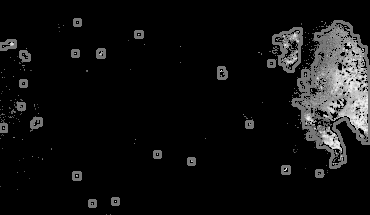

In [171]:
from PIL import Image
import cv2

im_map_raw = im_map.copy()
cv2.drawContours(im_map_raw, boundary, -1, 120, 2)
Image.fromarray(im_map_raw)

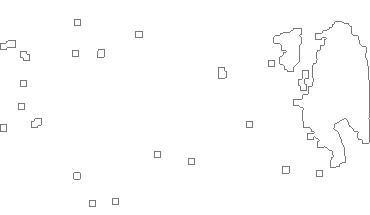

In [172]:
# just show boundary
CntExternalMask = np.ones(im_map.shape[:2], dtype="uint8") * 255
cv2.drawContours(CntExternalMask, boundary, -1, 120, 1)
Image.fromarray(CntExternalMask)

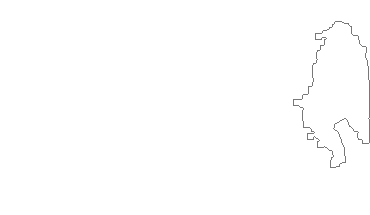

In [173]:
smoothed_b = edge.smooth_boundary([boundary[0]], factor=0.0001, intp=False,n_interp=200) # 0.002

CntExternalMask = np.ones(im_map.shape[:2], dtype="uint8") * 255
cv2.drawContours(CntExternalMask, smoothed_b, -1, 120, 1)
Image.fromarray(CntExternalMask)


In [174]:
def _filter_line(bound_ploy, x_left, x_right, y_bottom, y_top):
    """
    x_left < x_right
    y_bottom > y_top
    """
    u_bound = []
    for x,y in zip(bound_ploy.boundary.xy[0],bound_ploy.boundary.xy[1]):
        if (x > x_left and y > y_top) and (x < x_right and y < y_bottom):
            u_bound.append([x,y])
        else:
            u_bound.append([None, None])
    arr = np.array(u_bound)
    return arr

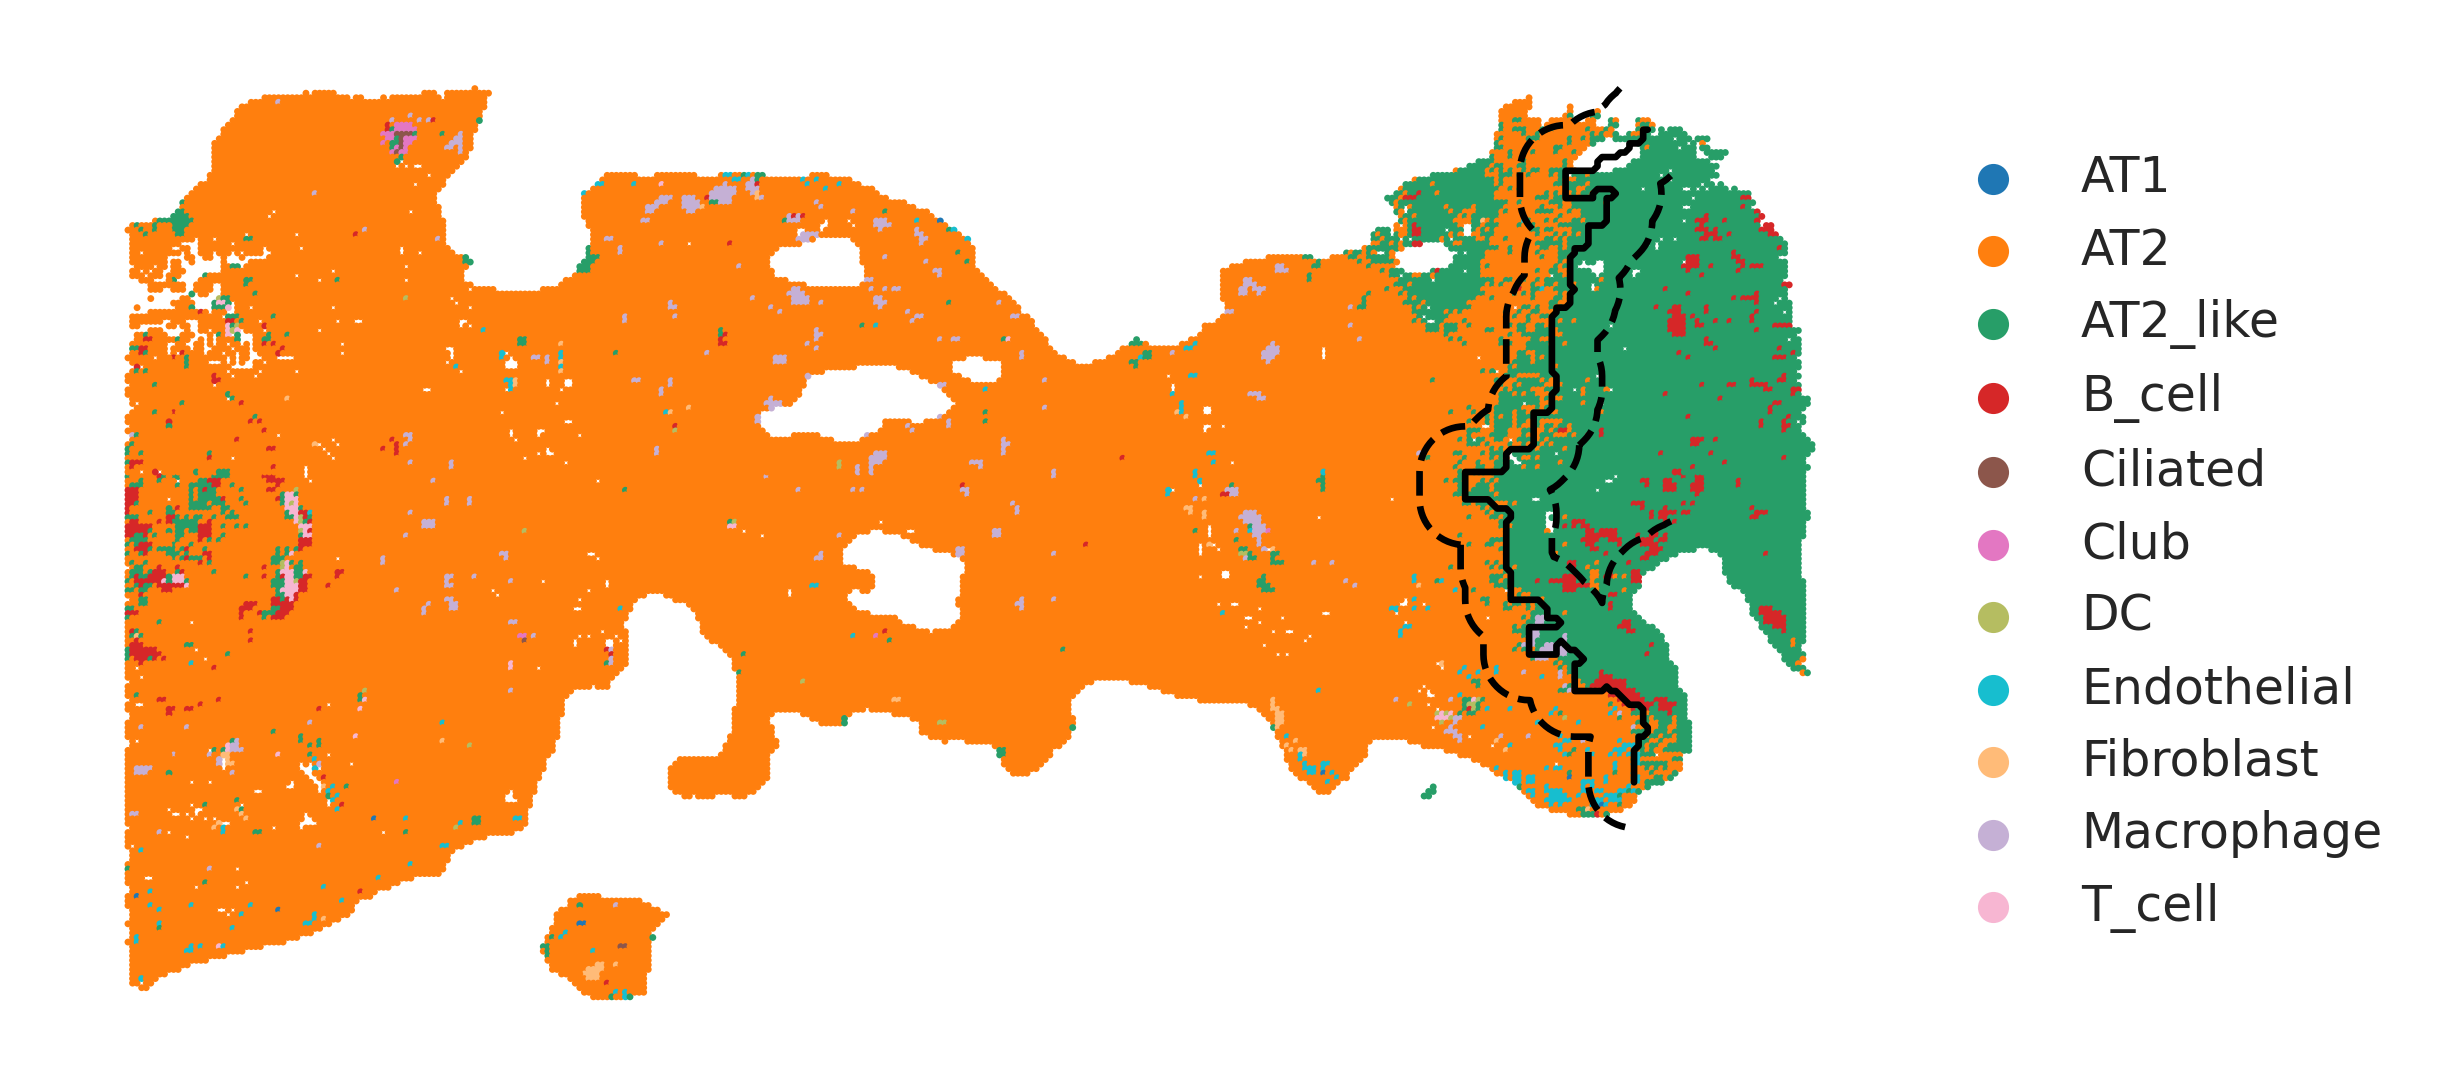

In [187]:
# draw plot to show boundary
# distance = 10, equal to 500 mum
roi_b = smoothed_b[0]
o_b, f_b, b_b = edge.find_distance_boundary(roi_b, distance=10)

fig,ax = plt.subplots(figsize=(6,6))
sc.pl.spatial(adata, color=['cell2location_max'], title='', spot_size=1.5,frameon = False, show=False, ax=ax, palette = set_cell2loc_palette(celltype_list))

x_left, x_right = ax.get_xlim()
y_bottom, y_top = ax.get_ylim()

ob_b = _filter_line(o_b, x_left, x_right-55, y_bottom-50, y_top+10)

fb_b = _filter_line(f_b, x_left+10, x_right-60, y_bottom-10, y_top+10)
bb_b = _filter_line(b_b, x_left, x_right-50, y_bottom-10, y_top+10)

ax.plot(ob_b[:,0],ob_b[:,1], color='black')
ax.plot(fb_b[:,0],fb_b[:,1], color='black', linestyle='dashed')
ax.plot(bb_b[:,0],bb_b[:,1], color='black', linestyle='dashed')

plt.savefig(f"results/edge/boundary_{pat_id}.pdf", dpi=400, bbox_inches='tight',format='pdf')

In [188]:
from shapely.geometry import Point
coords = adata.obsm['spatial']
coords_pt = list(map(Point, zip(coords[:,0],coords[:,1])))

def get_pt_btw_boundary(coords_pt, outer_b, in_b):
    return np.array([1 if outer_b.contains(i) and not in_b.contains(i) else 0 for i in coords_pt])

In [189]:


o_b, f_b_p5, b_b_m5 = edge.find_distance_boundary(roi_b, distance=5)
_, f_b_p10, b_b_m10 = edge.find_distance_boundary(roi_b, distance=10)
_, f_b_p15, b_b_m15 = edge.find_distance_boundary(roi_b, distance=15)
_, f_b_p20, b_b_m20 = edge.find_distance_boundary(roi_b, distance=20)

_, f_b_p25, b_b_m25 = edge.find_distance_boundary(roi_b, distance=25)

pt_in_p5_ob = get_pt_btw_boundary(coords_pt, f_b_p5, o_b)
pt_in_p10_p5 = get_pt_btw_boundary(coords_pt, f_b_p10, f_b_p5)
pt_in_p15_p10 = get_pt_btw_boundary(coords_pt, f_b_p15, f_b_p10)
pt_in_p20_p15 = get_pt_btw_boundary(coords_pt, f_b_p20, f_b_p15)
pt_in_p25_p20 = get_pt_btw_boundary(coords_pt, f_b_p25, f_b_p20)

pt_in_m5_ob = get_pt_btw_boundary(coords_pt, o_b, b_b_m5)
pt_in_m10_m5 = get_pt_btw_boundary(coords_pt, b_b_m5, b_b_m10)
pt_in_m15_m10 = get_pt_btw_boundary(coords_pt, b_b_m10, b_b_m15)
pt_in_m20_m15 = get_pt_btw_boundary(coords_pt, b_b_m15, b_b_m20)
pt_in_m25_m20 = get_pt_btw_boundary(coords_pt, b_b_m20, b_b_m25)


In [190]:
adata_p5_ob = adata[pt_in_p5_ob==1,:]
adata_p10_p5 = adata[pt_in_p10_p5==1,:]
adata_p15_p10 = adata[pt_in_p15_p10==1,:]
adata_p20_p15 = adata[pt_in_p20_p15==1,:]

adata_p25_p20 = adata[pt_in_p25_p20==1,:]

adata_m5_ob = adata[pt_in_m5_ob==1,:]
adata_m10_m5 = adata[pt_in_m10_m5==1,:]
adata_m15_m10 = adata[pt_in_m15_m10==1,:]
adata_m20_m15 = adata[pt_in_m20_m15==1,:]

adata_m25_m20 = adata[pt_in_m25_m20==1,:]

In [191]:
adas = [adata_p5_ob, adata_p10_p5, adata_p15_p10, adata_p20_p15,adata_p25_p20, adata_m5_ob, adata_m10_m5, adata_m15_m10, adata_m20_m15,adata_m25_m20]
dist_lab = ['0-5','5-10','10-15','15-20','20-25', '-5-0', '-10--5','-15--10','-20--15','-25--20']
# dist_lab = [-1,-2,-3, -4, 1, 2, 3 , 4]
# orders = ['15-20','10-15','5-10','0-5', '-5-0', '-10--5','-15--10','-20--15']

df_cell_type_frac_regs=None
for i, ada in enumerate(adas):
    if i==0:
        df_cell_type_frac = ada.obsm['cell_type_update'].copy()
        df_cell_type_frac['region'] = [dist_lab[i]] * df_cell_type_frac.shape[0]
        df_cell_type_frac_regs = df_cell_type_frac
    else:
        df_cell_type_frac1 = ada.obsm['cell_type_update'].copy()
        df_cell_type_frac1['region'] = [dist_lab[i]] * df_cell_type_frac1.shape[0]
        df_cell_type_frac_regs = pd.concat([df_cell_type_frac_regs, df_cell_type_frac1], ignore_index=True)


In [192]:
import pickle
with open(f'results/edge/adatas_{pat_id}.pkl','wb') as f:
    pickle.dump(adas, f)

In [193]:
df_cell_type_frac_regs

,AT1,AT2,AT2_like,B_cell,Basal,Ciliated,Club,DC,Endothelial,Erythrocyte,...,Granulocyte,MAST_cell,Macrophage,NK,T_cell,sec_max_ind,top_max_ind,ratio,ct_update,region
0,0.045686,0.294122,0.201376,0.085448,0.013929,0.011455,0.065418,0.015878,0.094320,0.007888,...,0.016215,0.014112,0.007275,0.022884,0.020160,2,1,1.460560,AT2,0-5
1,0.025149,0.233547,0.358843,0.105889,0.033198,0.030594,0.040517,0.029165,0.063923,0.001779,...,0.008913,0.008567,0.001739,0.010652,0.010727,1,2,1.536492,AT2_like,0-5
2,0.041455,0.293045,0.224868,0.087482,0.047864,0.041555,0.046337,0.007780,0.068658,0.002286,...,0.016740,0.008333,0.010869,0.014535,0.010731,2,1,1.303183,AT2,0-5
3,0.097519,0.299384,0.167532,0.070523,0.013613,0.015237,0.073231,0.012545,0.096580,0.017380,...,0.008152,0.021506,0.003093,0.026239,0.017502,2,1,1.787025,AT2,0-5
4,0.048945,0.290699,0.196087,0.068518,0.024816,0.033355,0.060416,0.013895,0.093325,0.019782,...,0.023220,0.011868,0.003987,0.025188,0.019126,2,1,1.482499,AT2,0-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10369,0.007953,0.012190,0.472999,0.252374,0.028961,0.005461,0.002629,0.036698,0.049077,0.000385,...,0.000419,0.006111,0.006811,0.009264,0.011367,3,2,1.874196,AT2_like,-25--20
10370,0.007705,0.030285,0.477282,0.198085,0.027252,0.009065,0.004697,0.035026,0.054480,0.000539,...,0.001061,0.010324,0.006494,0.006678,0.013515,3,2,2.409488,AT2_like,-25--20
10371,0.006409,0.013644,0.555955,0.185496,0.038261,0.007705,0.002160,0.036817,0.034781,0.000375,...,0.000448,0.006334,0.005704,0.004309,0.009878,3,2,2.997129,AT2_like,-25--20
10372,0.010489,0.013414,0.619504,0.158340,0.038672,0.008282,0.001811,0.038354,0.019905,0.000844,...,0.000392,0.005406,0.003137,0.003278,0.006543,3,2,3.912503,AT2_like,-25--20


In [194]:
df_cell_type_frac_regs.to_csv(f"results/edge/cell_boundary_{pat_id}.csv", index=False)

In [195]:
from matplotlib import cm, colors
x = list(map(colors.to_hex, sns.color_palette('pastel')))
print(x)
x = list(map(colors.to_hex, sns.color_palette('bright')))
print(x)


['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']
['#023eff', '#ff7c00', '#1ac938', '#e8000b', '#8b2be2', '#9f4800', '#f14cc1', '#a3a3a3', '#ffc400', '#00d7ff']


In [196]:
# bg_f = ['#b9f2f0', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#fffea3', ]
# ln_f = ['#00d7ff', '#ff7c00', '#1ac938', '#e8000b', '#8b2be2', '#9f4800', '#f14cc1', '#ffc400', ]
bg_f = ['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']
ln_f = ['#023eff', '#ff7c00', '#1ac938', '#e8000b', '#8b2be2', '#9f4800', '#f14cc1', '#a3a3a3', '#ffc400', '#00d7ff']

In [197]:
sns.color_palette(x)

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [198]:
import plotting

In [199]:
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches

def plot_show(df_cell_type_frac_regs, val_col, save=True, y_label='Fraction of Cell Type', gene=False, gene_cell_type=None, bg_f=bg_f, ln_f=ln_f):
    
    comp_pairs = [('20-25','15-20'),('15-20','10-15'),('10-15','5-10'),('5-10','0-5'), ('0-5','-5-0'), 
                  ('-5-0','-10--5'), ('-10--5','-15--10'),('-15--10','-20--15'),('-20--15','-25--20')]
    orders = ['20-25','15-20','10-15','5-10','0-5', '-5-0', '-10--5','-15--10','-20--15','-25--20']

    fig = plt.figure(figsize=(4.5,3.2))
    gs1 = GridSpec(2, 1, hspace=0.3,height_ratios=[8, 1.2])
    ax1 = fig.add_subplot(gs1[0])
    ax2 = fig.add_subplot(gs1[1])

    axa = plotting.boxplot(df_cell_type_frac_regs, 'region', val_col, ax1, comp_pairs,orders=orders, gene=gene,bg_f=bg_f, ln_f=ln_f)

    ax1.axvline(4.5,linewidth=0.8, color='gray', linestyle='dashed',ymax=0.6)
    ax1.tick_params(pad=1)
    ax1.set_xticklabels(
        labels=['-1250 $\mu$m','-1000 $\mu$m','-750 $\mu$m','-500 $\mu$m','-250 $\mu$m','250 $\mu$m','500 $\mu$m','750 $\mu$m','1000 $\mu$m','1250 $\mu$m'], rotation=20,ha='center', va='top')
    ax1.set_xlabel(None)
    ax1.set_ylabel(y_label)
    if not gene:
        ax1.set_title(val_col)
    else:
        ax1.set_title(f'$\it{val_col}$')

    p = patches.FancyArrowPatch((0, 0.5), (1, 0.5), arrowstyle='<|-|>', mutation_scale=10,color='k')
    ax2.add_patch(p)
    ax2.plot([0.5,0.5],[0.5016,0.51],color='k')
    ax2.text(0.15, 0.472, 'Normal', ha='center', va='center')
    ax2.text(0.5, 0.472, 'Boundary', ha='center', va='center')
    ax2.text(0.85, 0.472, 'Tumor',  ha='center', va='center')
    ax2.axis('off')
    sns.despine()
    if save:
        if gene:
            plt.savefig(f"results/edge/{gene_cell_type}_{val_col}_{pat_id}.pdf", dpi=400, bbox_inches='tight',format='pdf')
        else:
            plt.savefig(f"results/edge/ct_{val_col}_{pat_id}.pdf", dpi=400, bbox_inches='tight',format='pdf')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

20-25 vs. 15-20: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.203e-01 U_stat=3.437e+05
15-20 vs. 10-15: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.496e-02 U_stat=4.477e+05
10-15 vs. 5-10: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.889e-14 U_stat=5.893e+05
5-10 vs. 0-5: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.882e-81 U_stat=8.840e+05
0-5 vs. -5-0: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.921e-218 U_stat=1.601e+06
-5-0 vs. -10--5: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.903e-73 U_stat=1.727e+06
-10--5 vs. -15--10: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correc

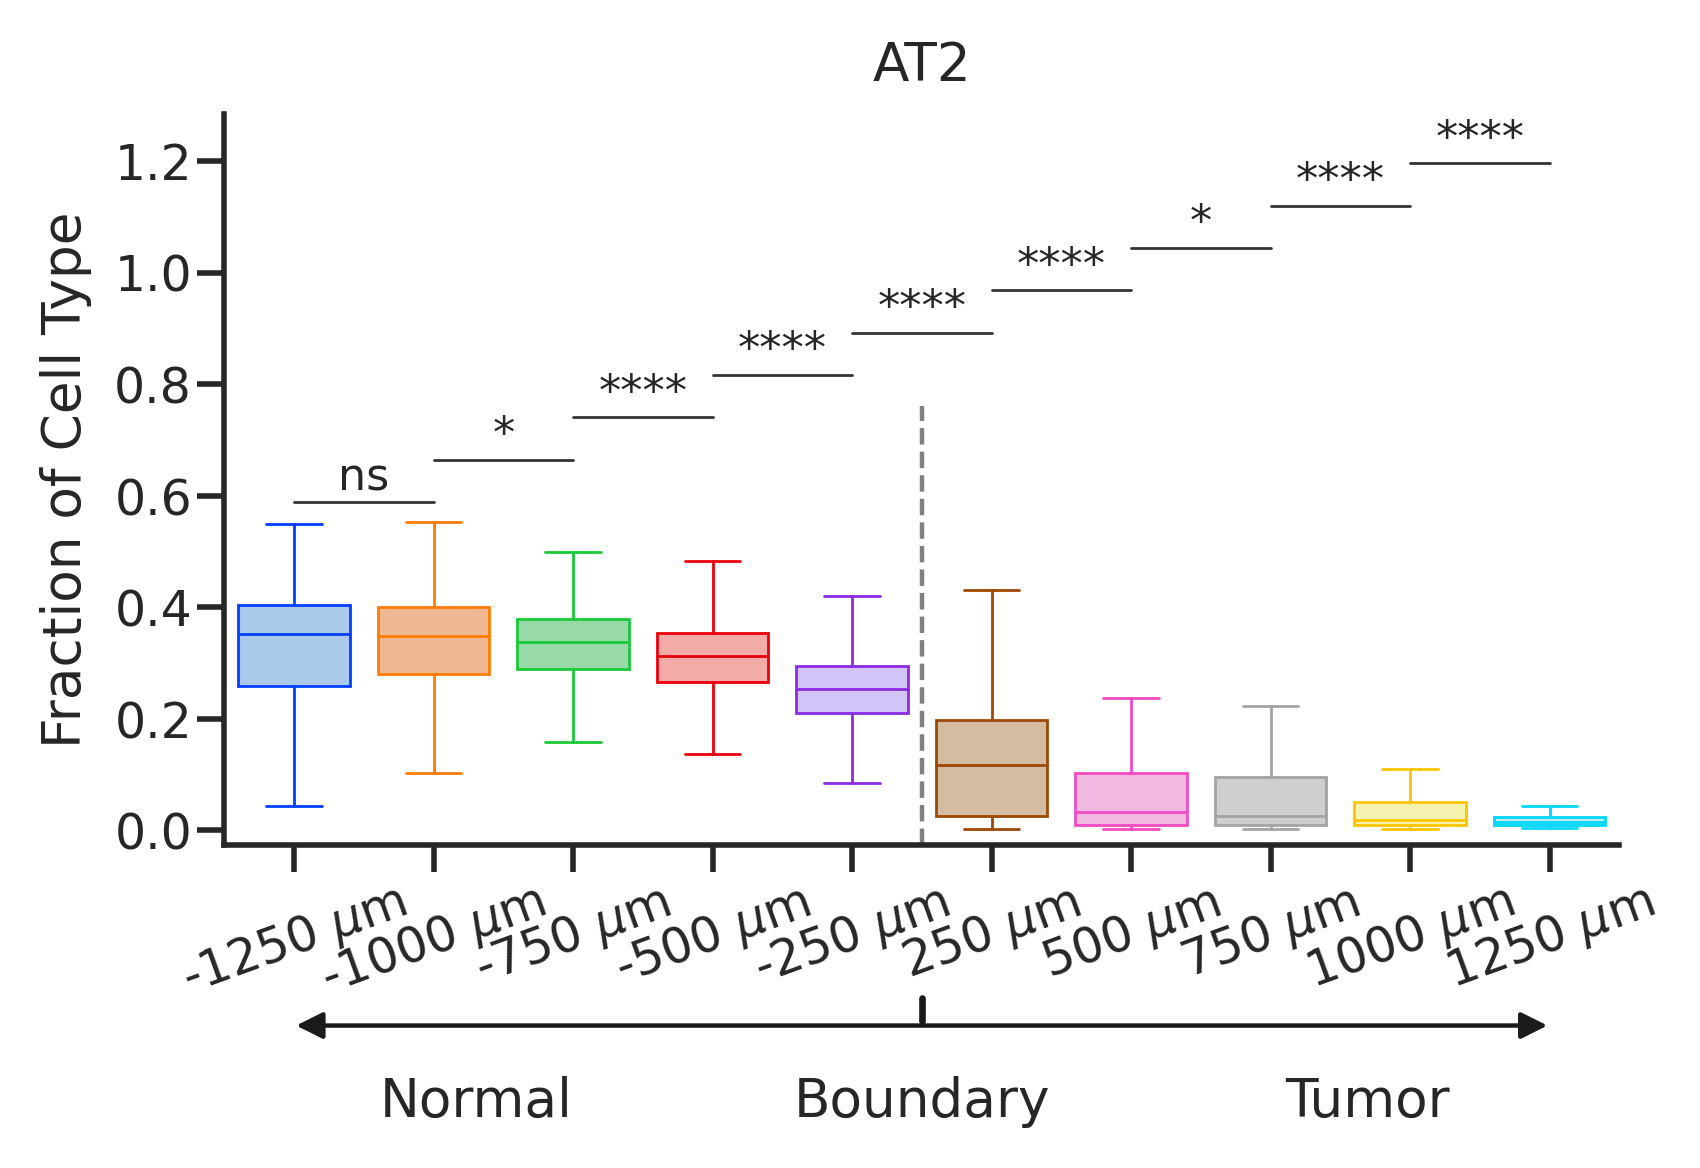

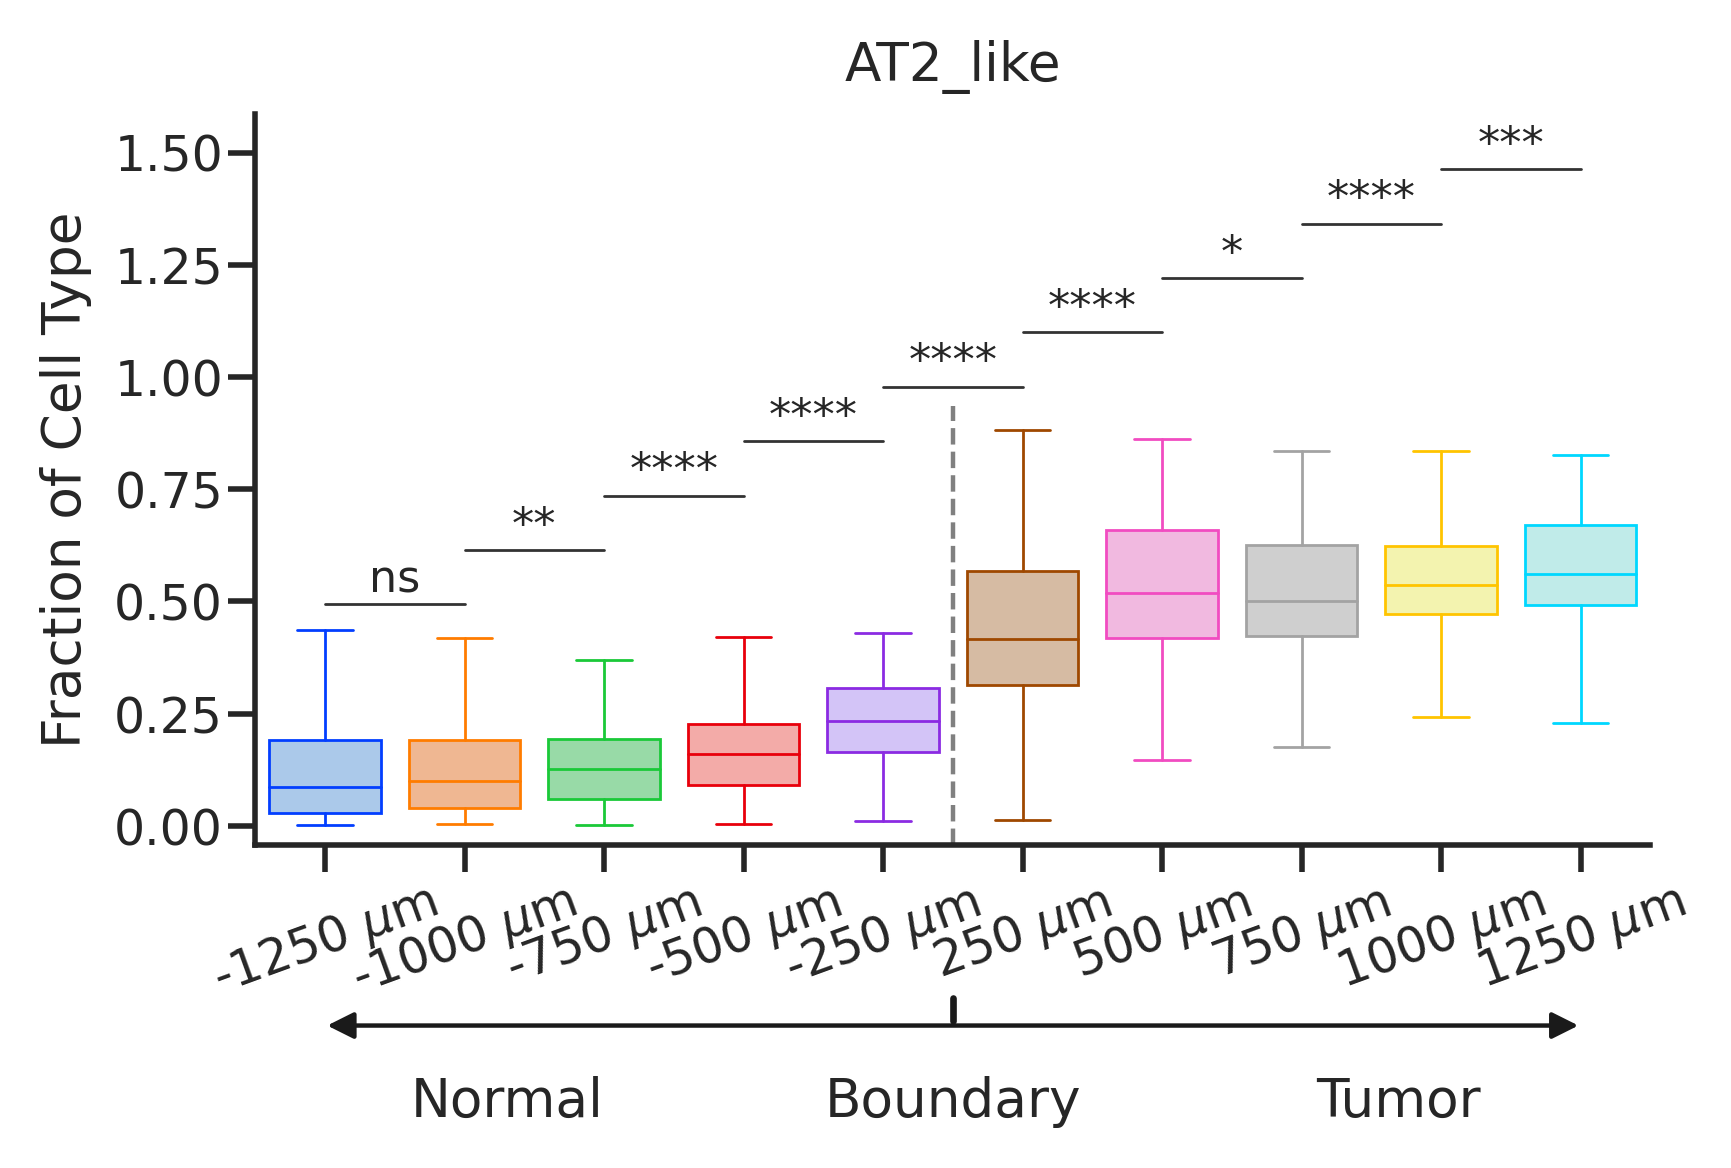

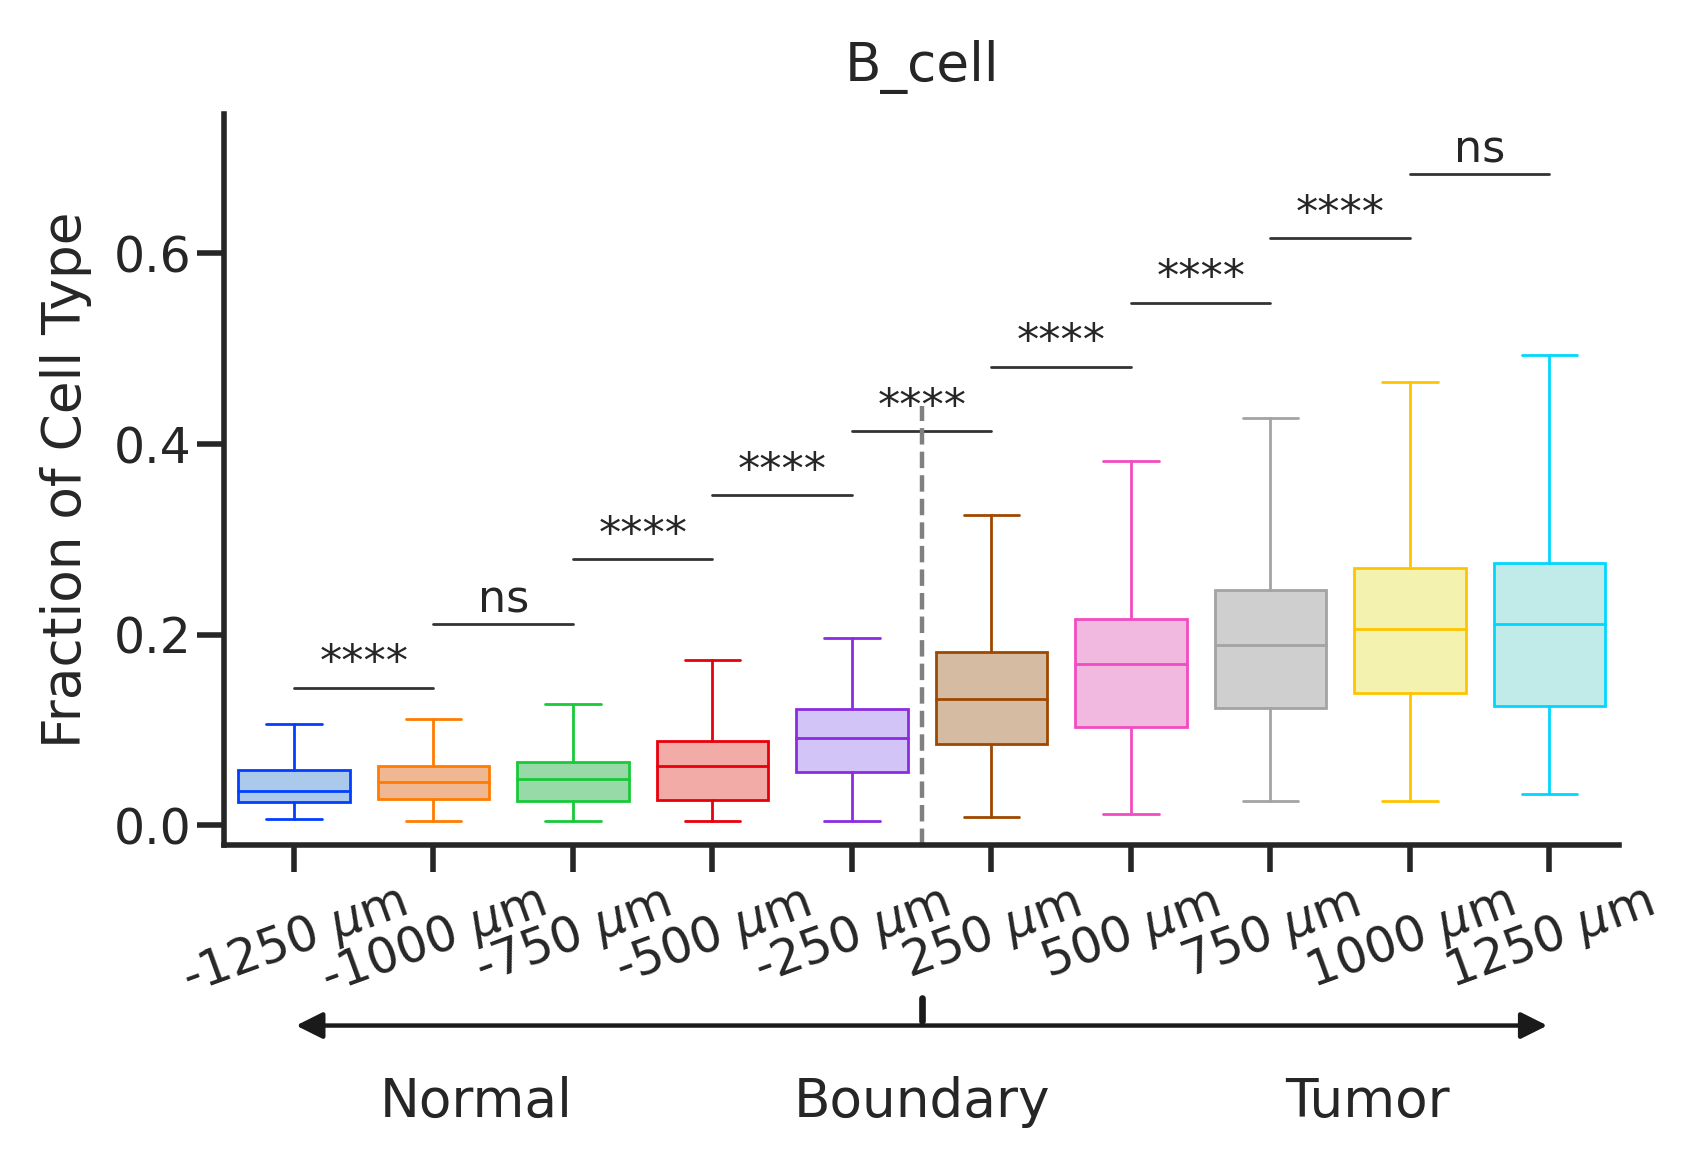

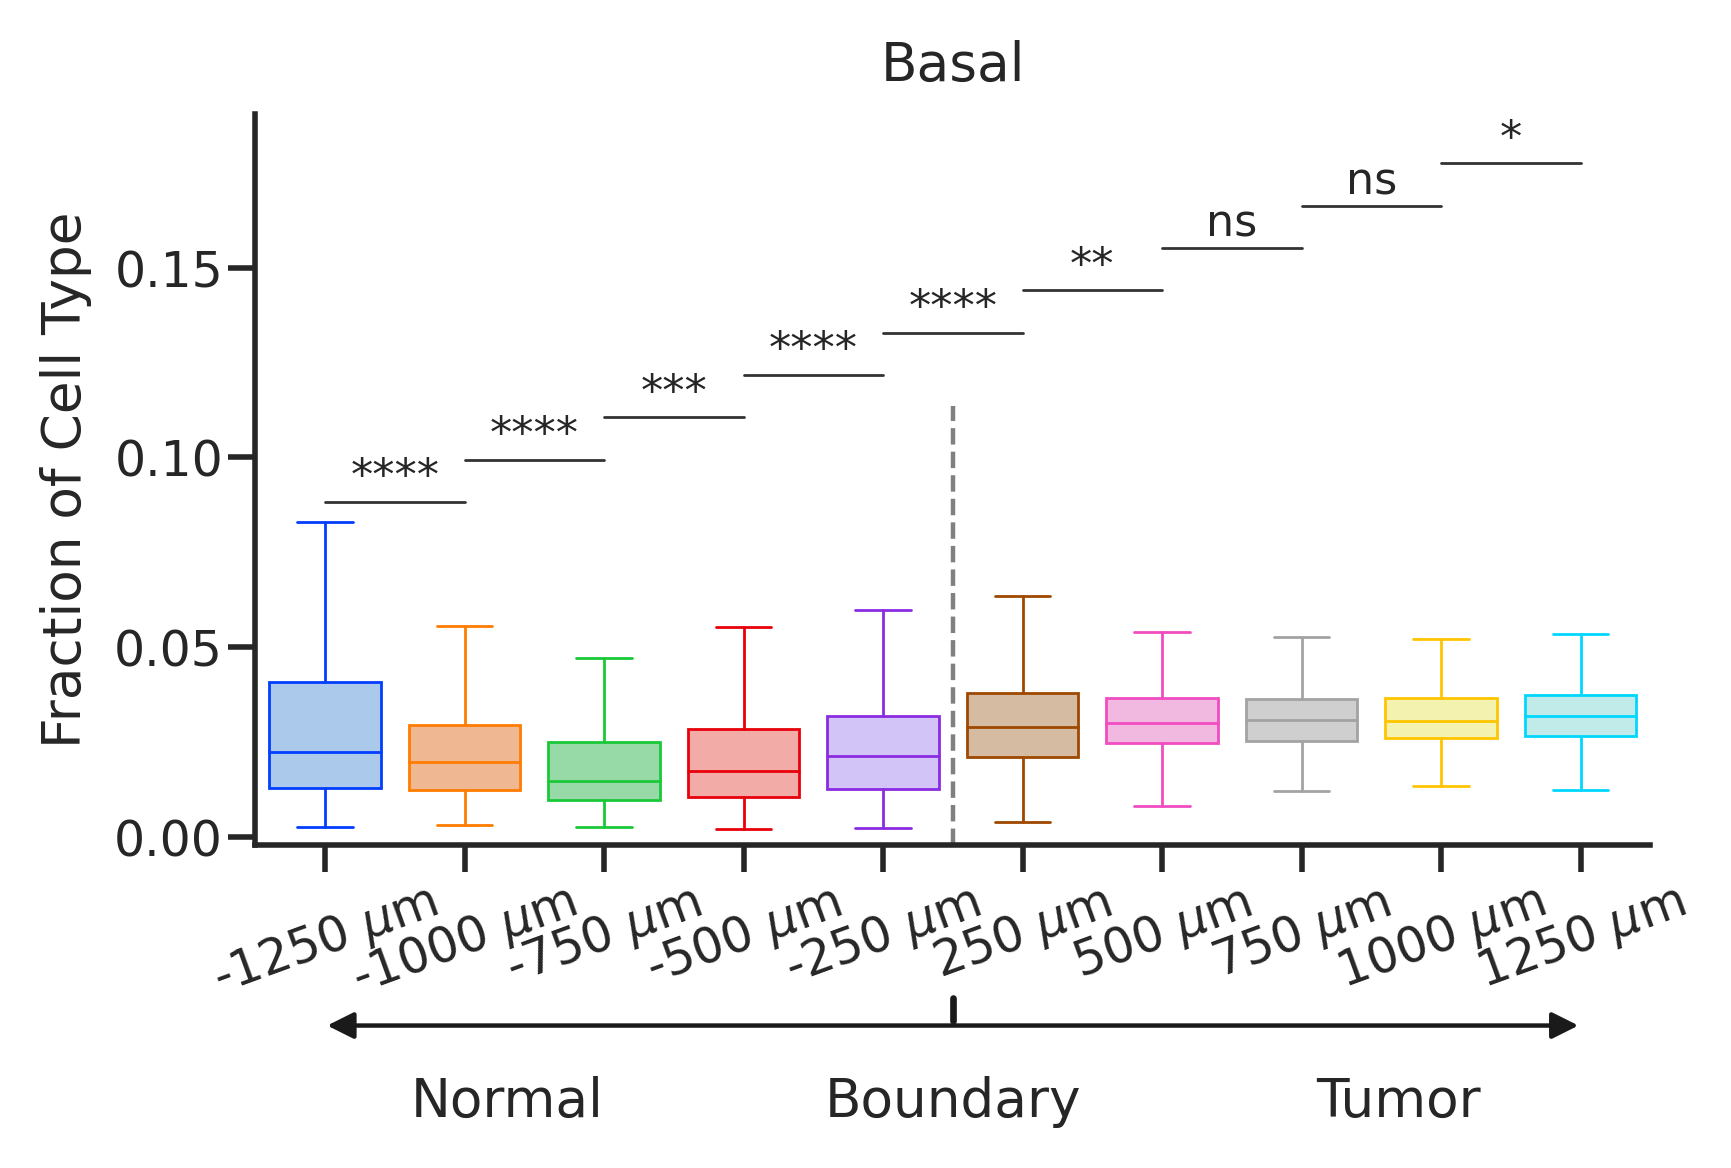

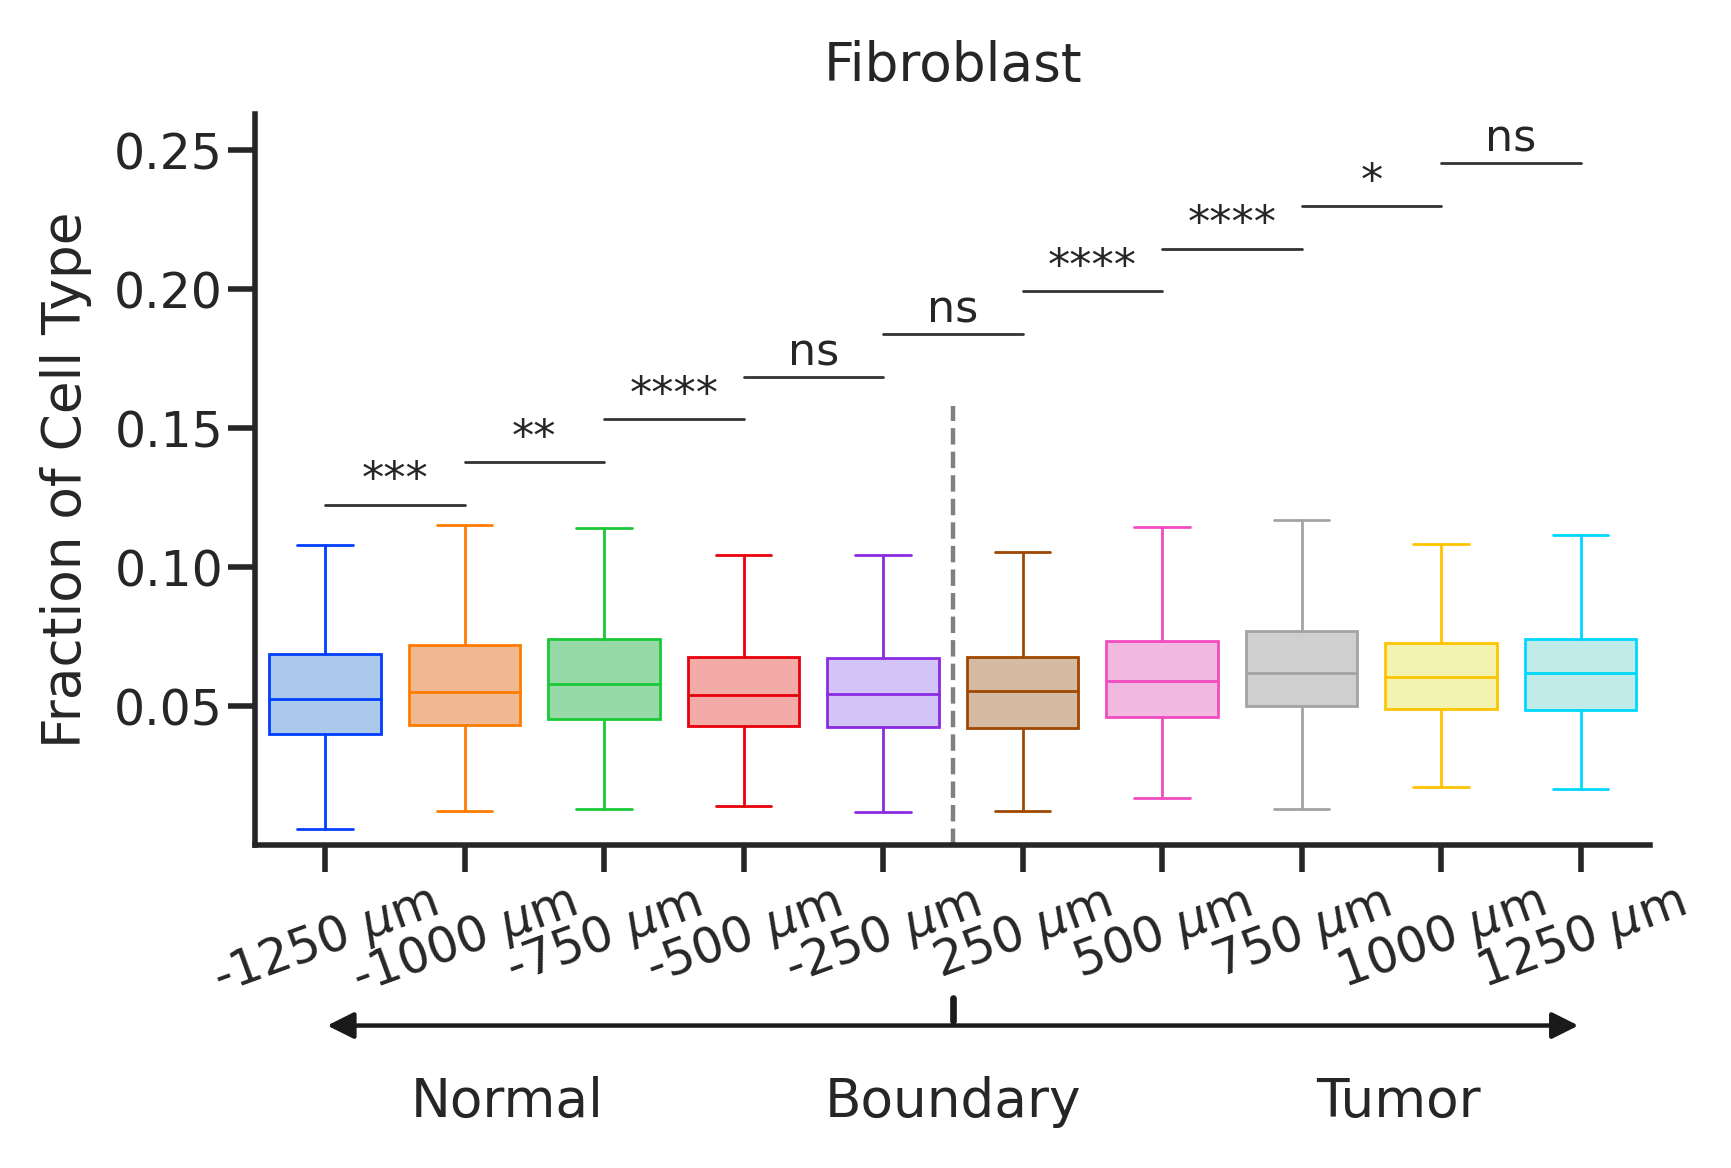

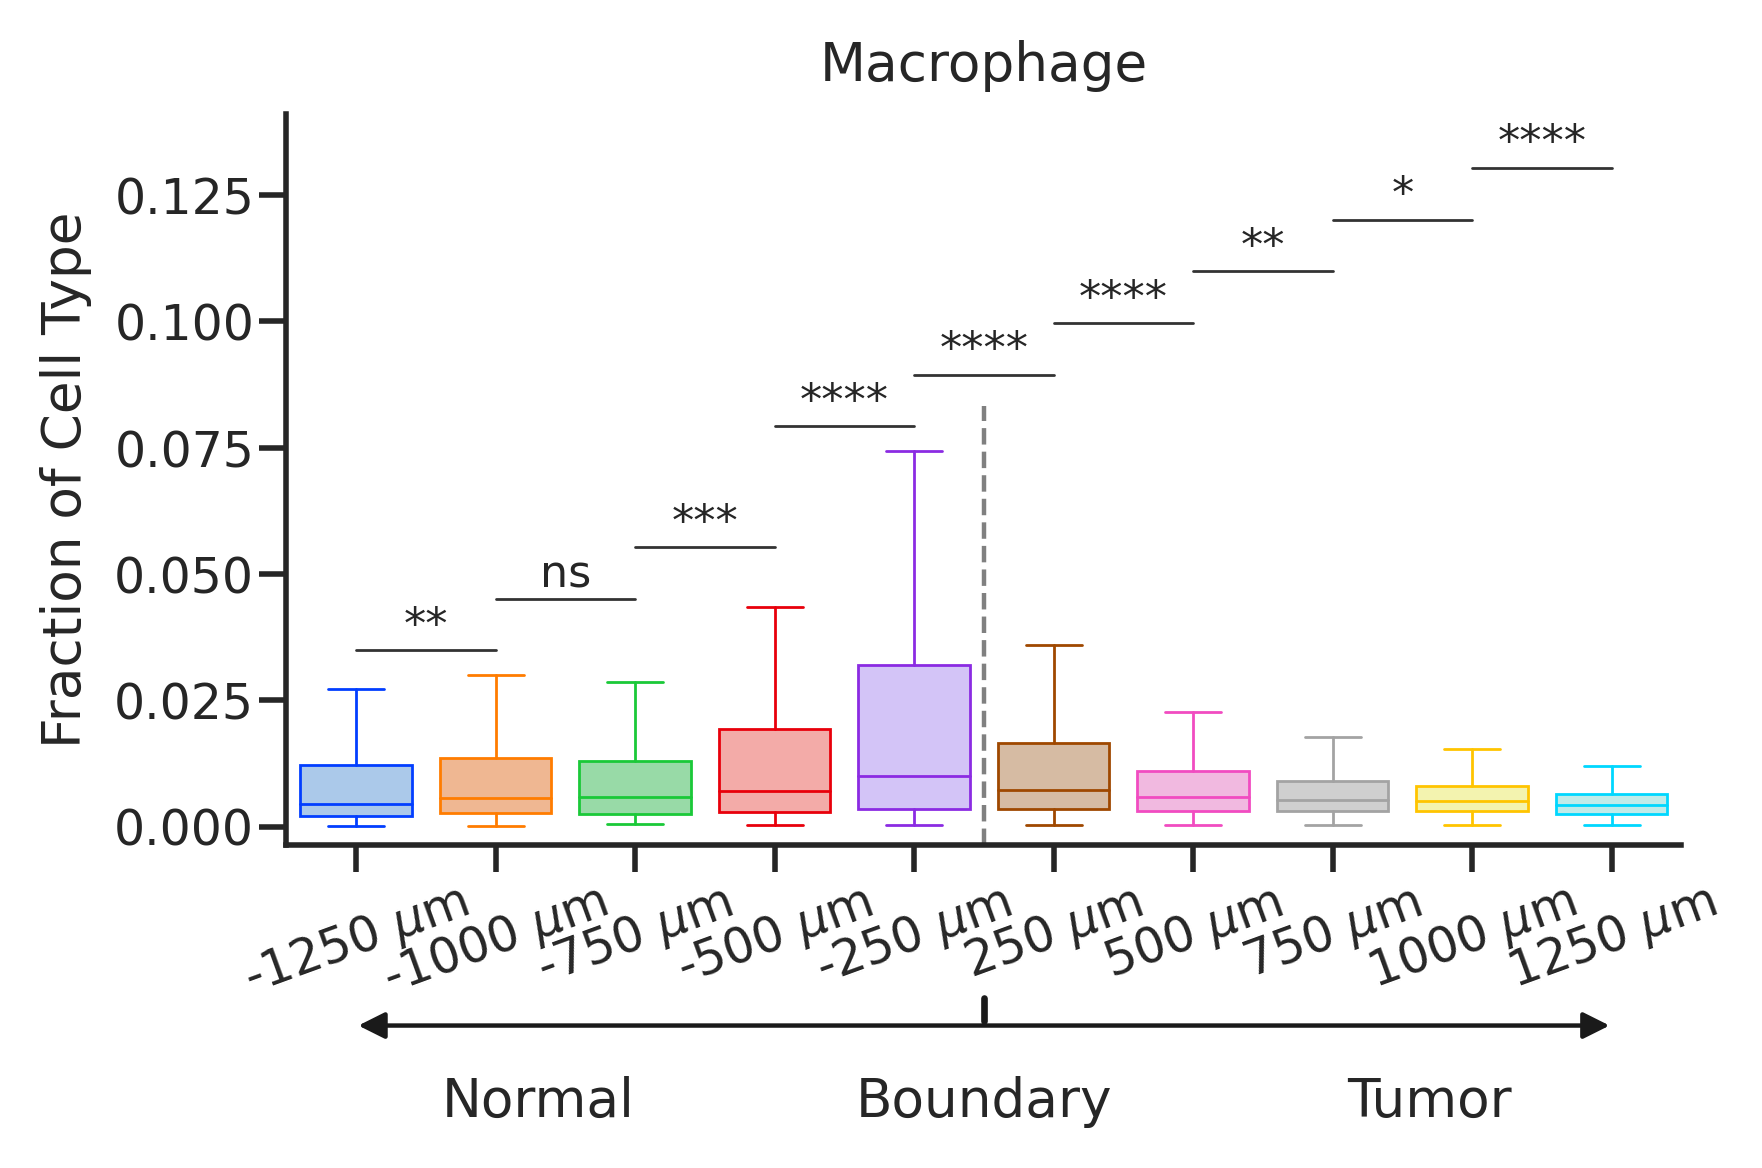

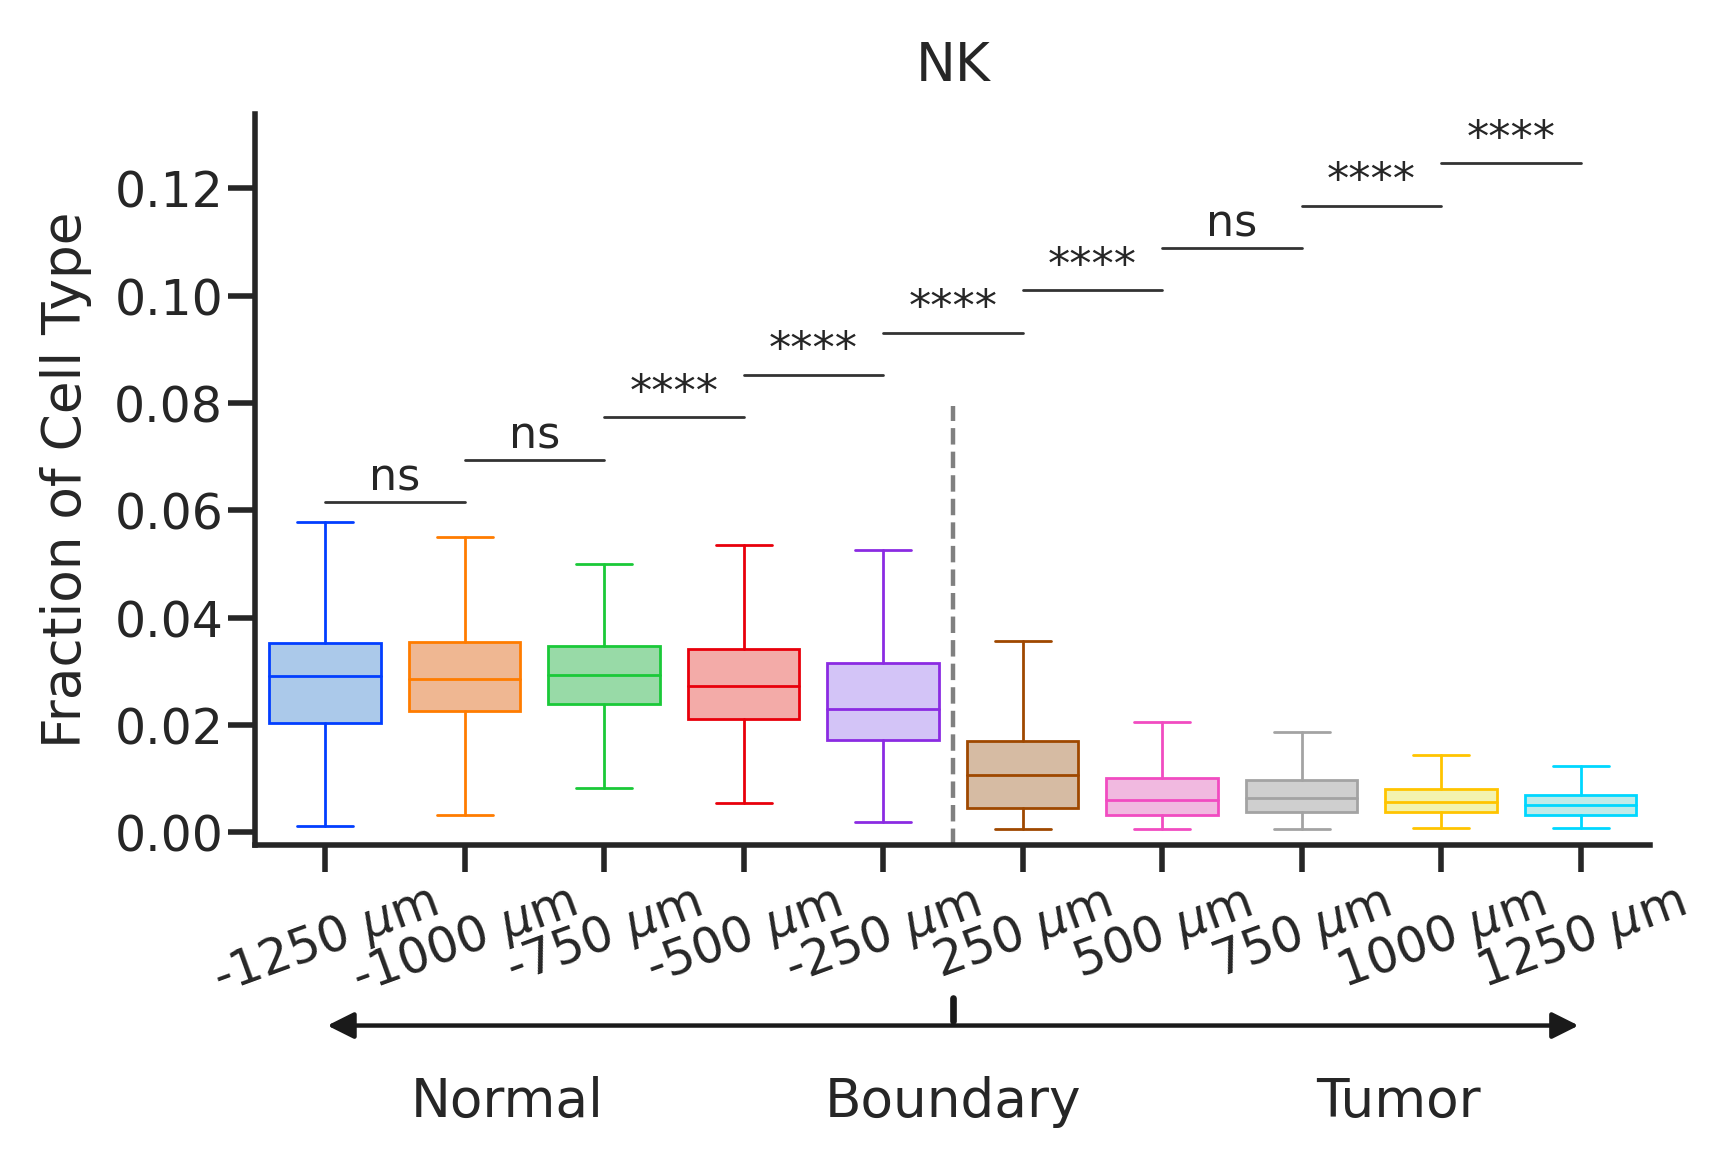

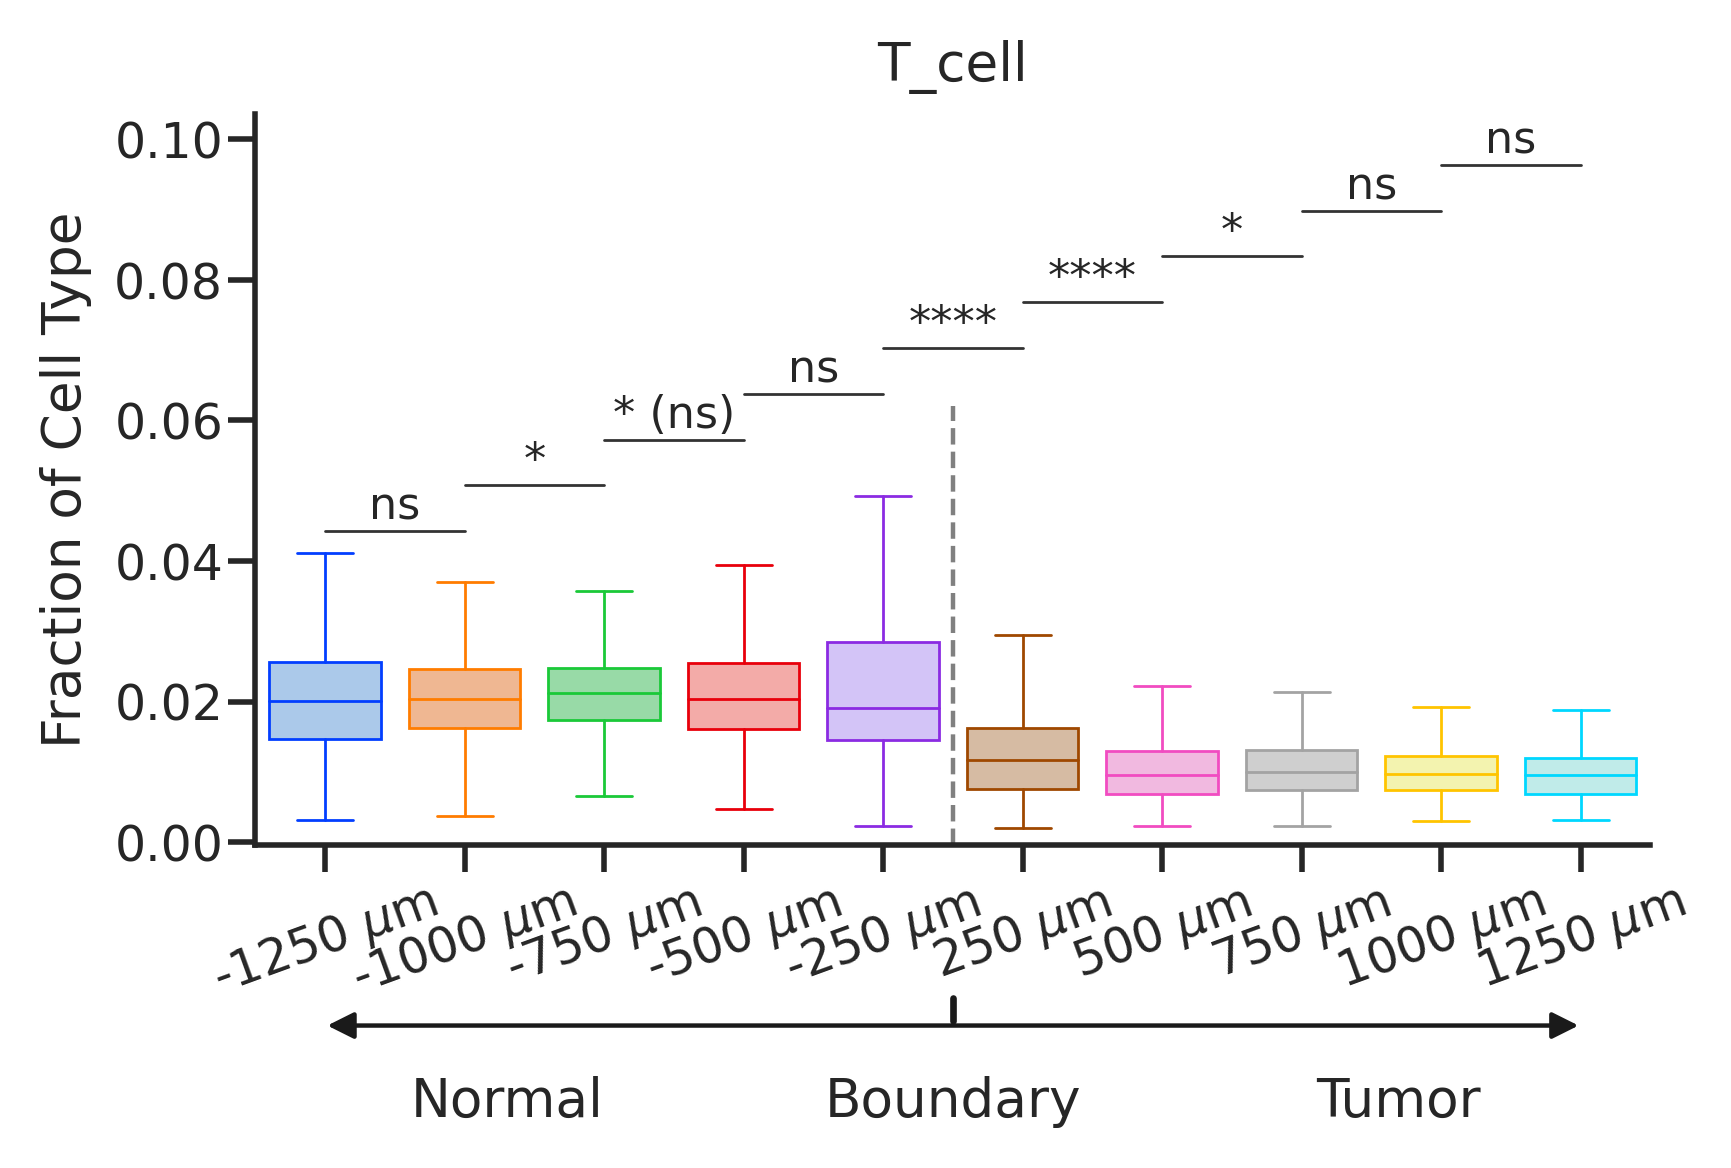

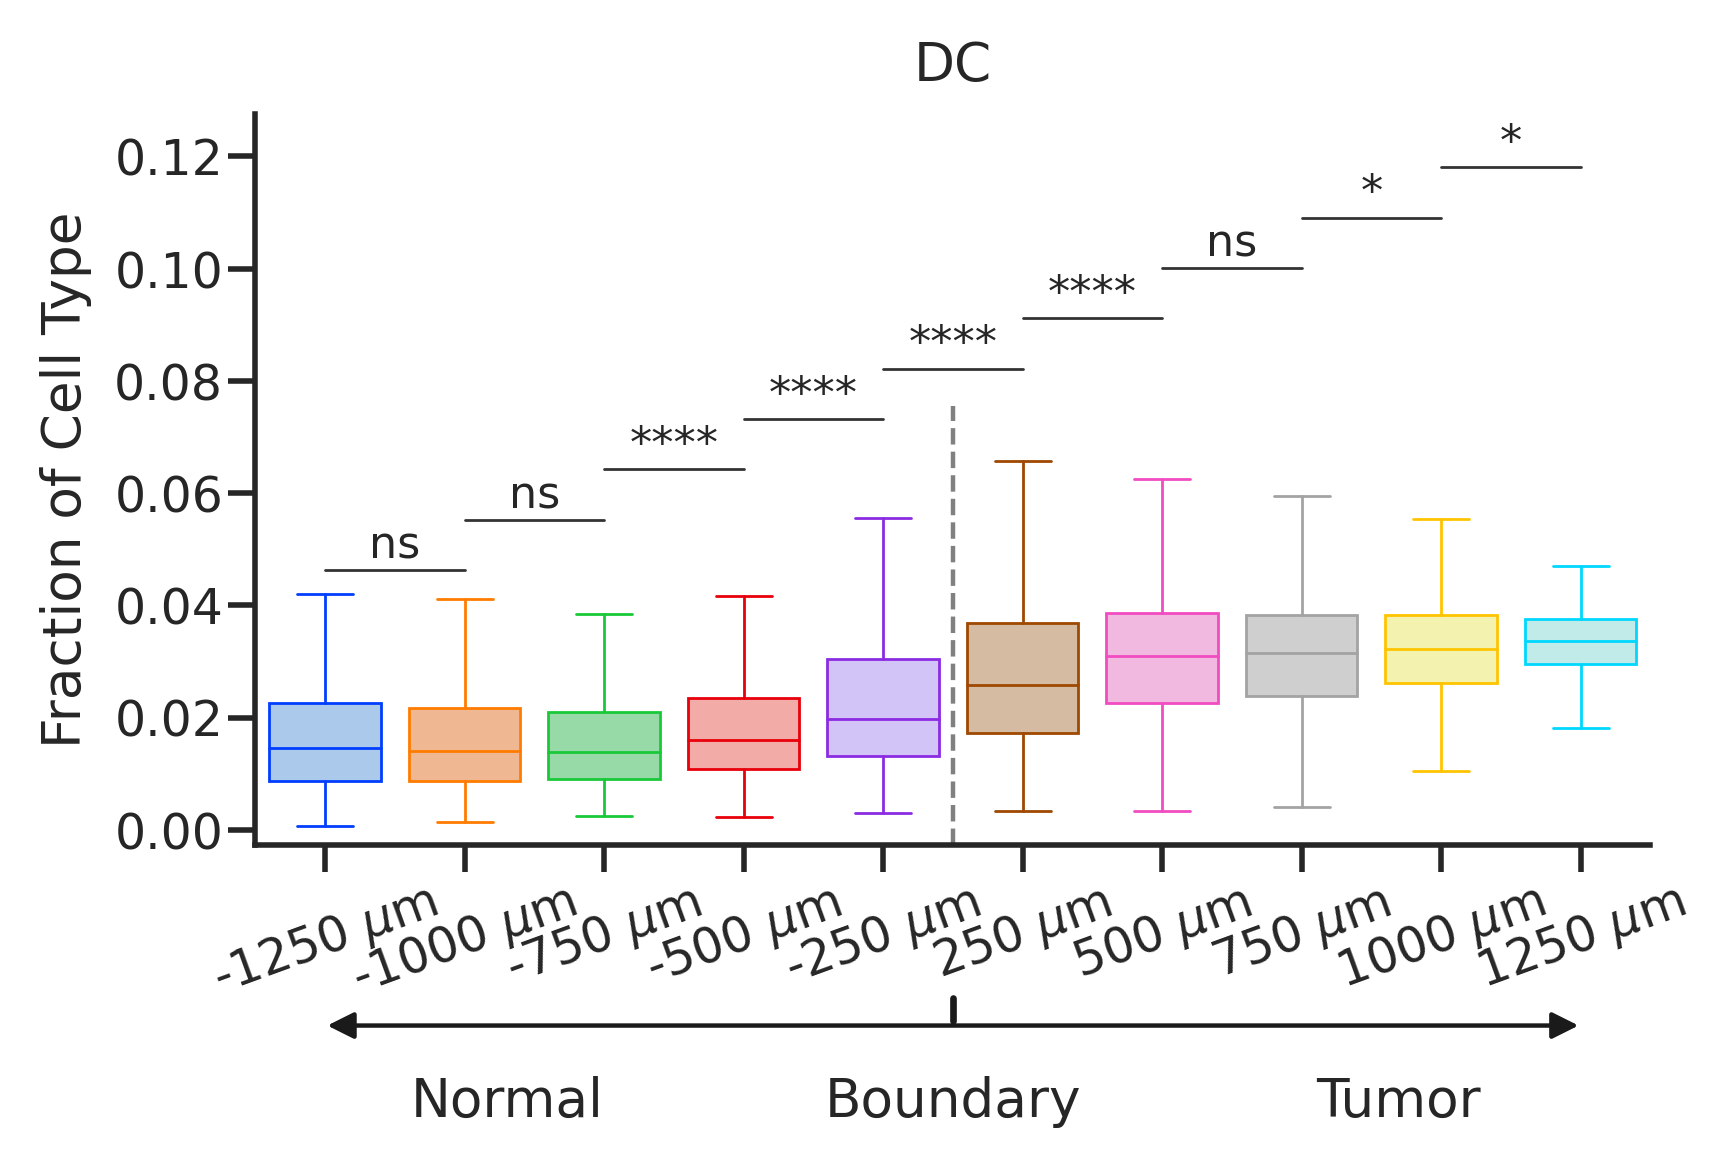

In [201]:
import matplotlib.font_manager # to solve: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
cells = ['AT2','AT2_like', 'B_cell', 'Basal', 'Fibroblast', 'Macrophage', 'NK', 'T_cell','DC']
for cc in cells:
    plot_show(df_cell_type_frac_regs,cc)

# Genes

In [53]:
celltype_list = ['AT1', 'AT2', 'AT2_like', 'B_cell', 'Basal', 'Ciliated', 'Club', 'DC', 
                 'Endothelial', 'Erythrocyte', 'Fibroblast', 'Granulocyte', 'MAST_cell', 'Macrophage', 'NK', 'T_cell']

gene_dict = {'DC': ['LYZ','HLA-DRB1','IL1B','LST1','HLA-DQA1','HLA-DQB1'],
            'Fibroblast':['LUM','DCN','FBLN1','APOD','COL1A1','IGFBP6','CFD'],
            'Macrophage':['CD68','MARCO','CTSD','C1QA','C1QB','APOC1','APOE'],
            'NK':['NKG7','GZMA','GNLY','CD3G','FGFBP2'],
            'T_cell':['CD2','CD3D','CD3E','CXCR4','IL32'],
             'B_cell':['MS4A1','FKBP11', 'DERL3','CD79A','MZB1','IGHA2'], # no 'IGLL5','IGJ' in data
            'Club':['SCGB1A1','SCGB3A1','PIGR','WFDC2'],
            'Ciliated':['CAPS','TPPP3','C9orf24'],
            'Endothelial':['RAMP2','VWF','GNG11','CLDNS','DARC'],
             'AT1':['RTKN2','EMP2'],
             'AT2':['PIGR', 'WFDC2','SFTA2','NAPSA','SFTPB','SFTPD','SFTPA1','SFTPC'],
             'AT2_like': ['MDK','TIMP1','IFI27','EPCAM','SCGB3A2'],
             'Basal':['KRT15','S100A2'] # no MIR205HG 
            }

In [56]:
adass = [adata_p5_ob.copy(), adata_p10_p5.copy(), adata_p15_p10.copy(), 
         adata_p20_p15.copy(), adata_m5_ob.copy(), adata_m10_m5.copy(), adata_m15_m10.copy(), adata_m20_m15.copy()]
dist_lab = ['0-5','5-10','10-15','15-20', '-5-0', '-10--5','-15--10','-20--15']

celltype_list = ['AT2_like', 'B_cell', 'Basal', 'Fibroblast', 'Macrophage', 'NK', 'T_cell']

celltype = 'T_cell'
df_gene=None
for i, ada in enumerate(adass):
    i_df_gene = ada[:, gene_dict[celltype]].to_df()
    i_df_gene['region'] = [dist_lab[i]] * i_df_gene.shape[0]
        
    if i==0:
        df_gene = i_df_gene
    else:
        df_gene = pd.concat([df_gene, i_df_gene], ignore_index=True)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

15-20 vs. 10-15: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.788e-01 U_stat=3.012e+05
10-15 vs. 5-10: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.580e-01 U_stat=3.774e+05
5-10 vs. 0-5: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:9.168e-03 U_stat=5.559e+05
0-5 vs. -5-0: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.520e-07 U_stat=1.642e+06
-5-0 vs. -10--5: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.616e-08 U_stat=3.939e+06
-10--5 vs. -15--10: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.201e-02 U_stat=3.790e+06
-15--10 vs. -20--15: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg cor

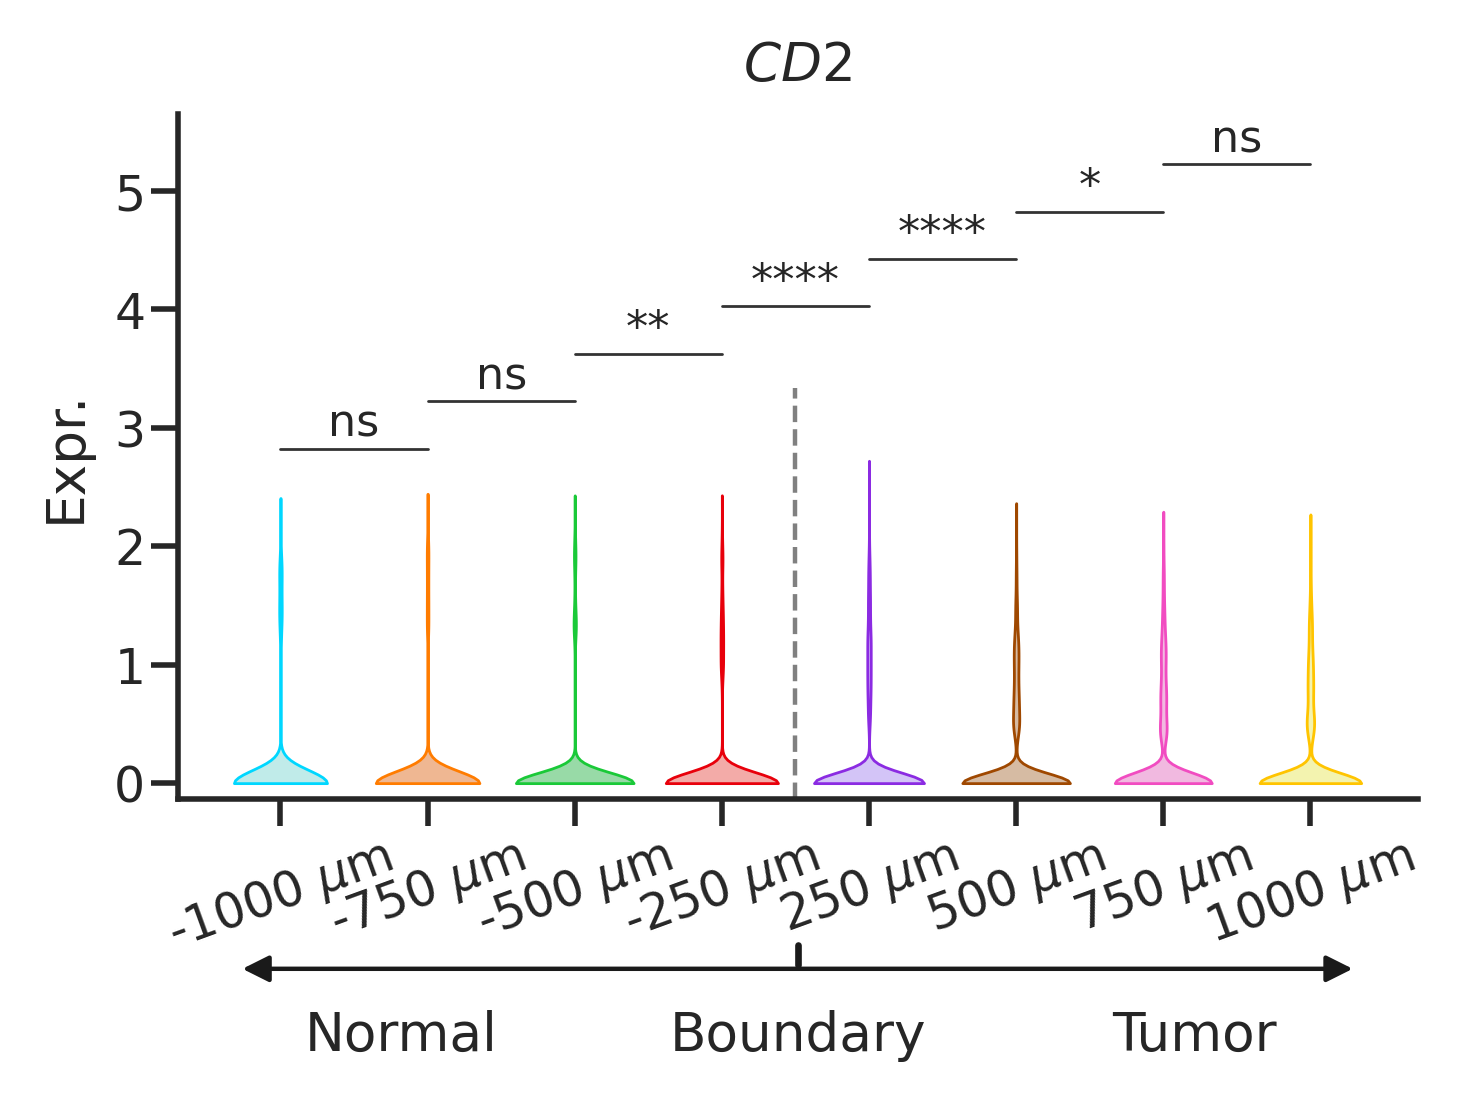

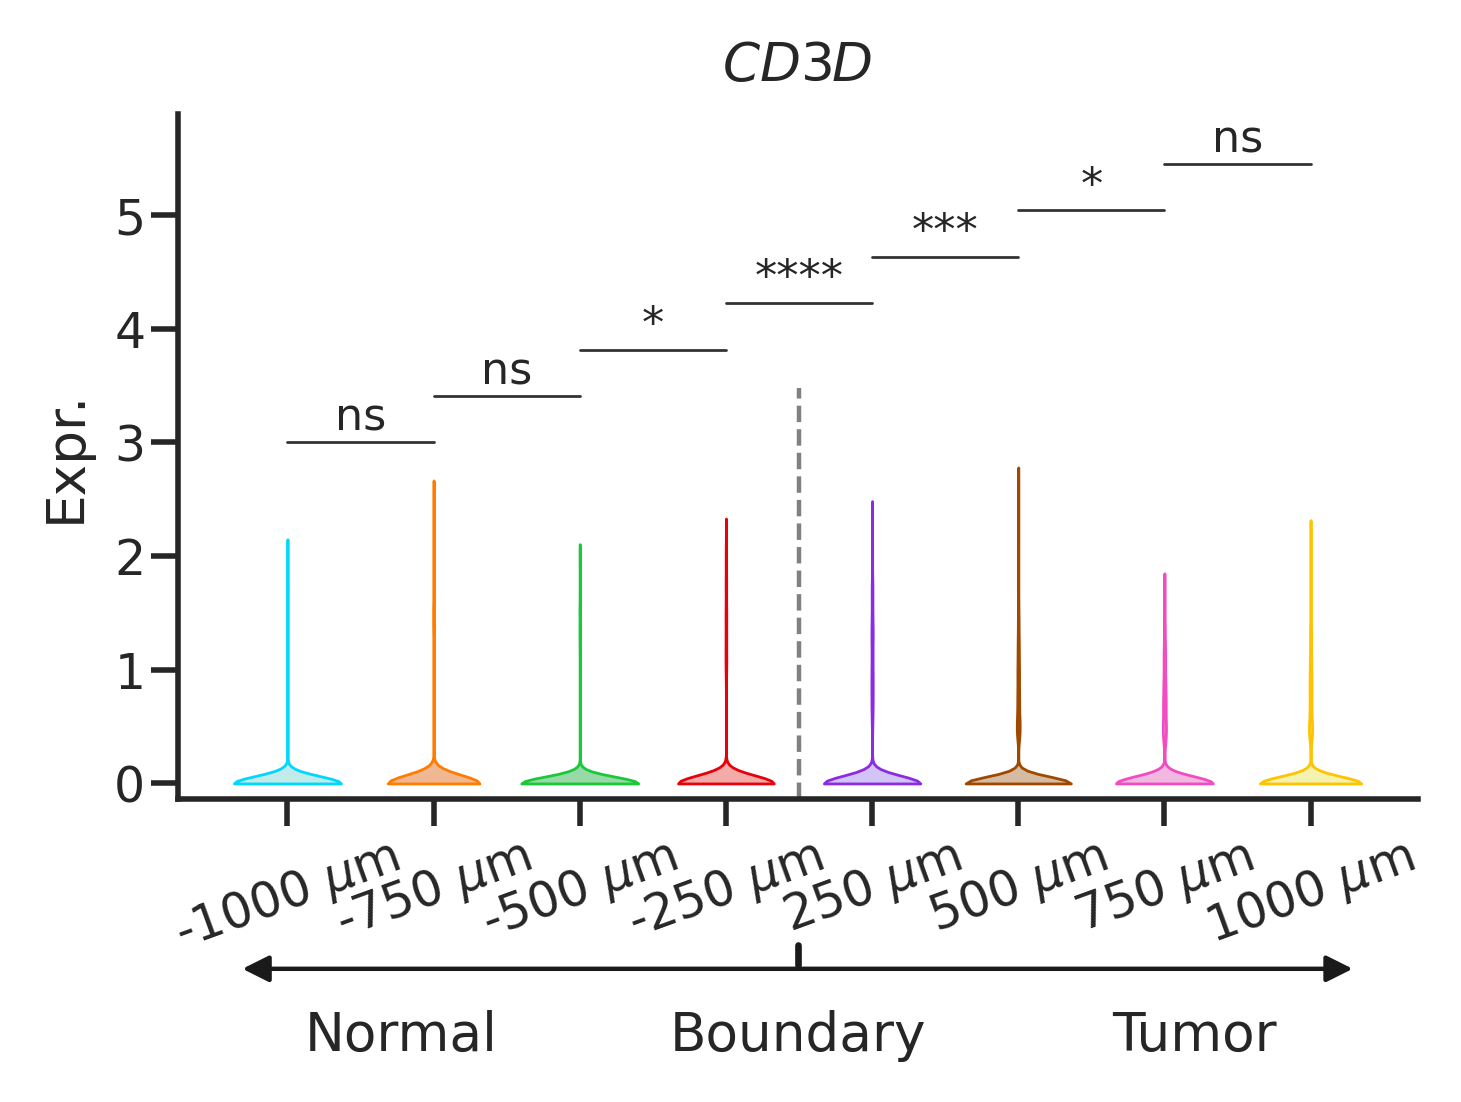

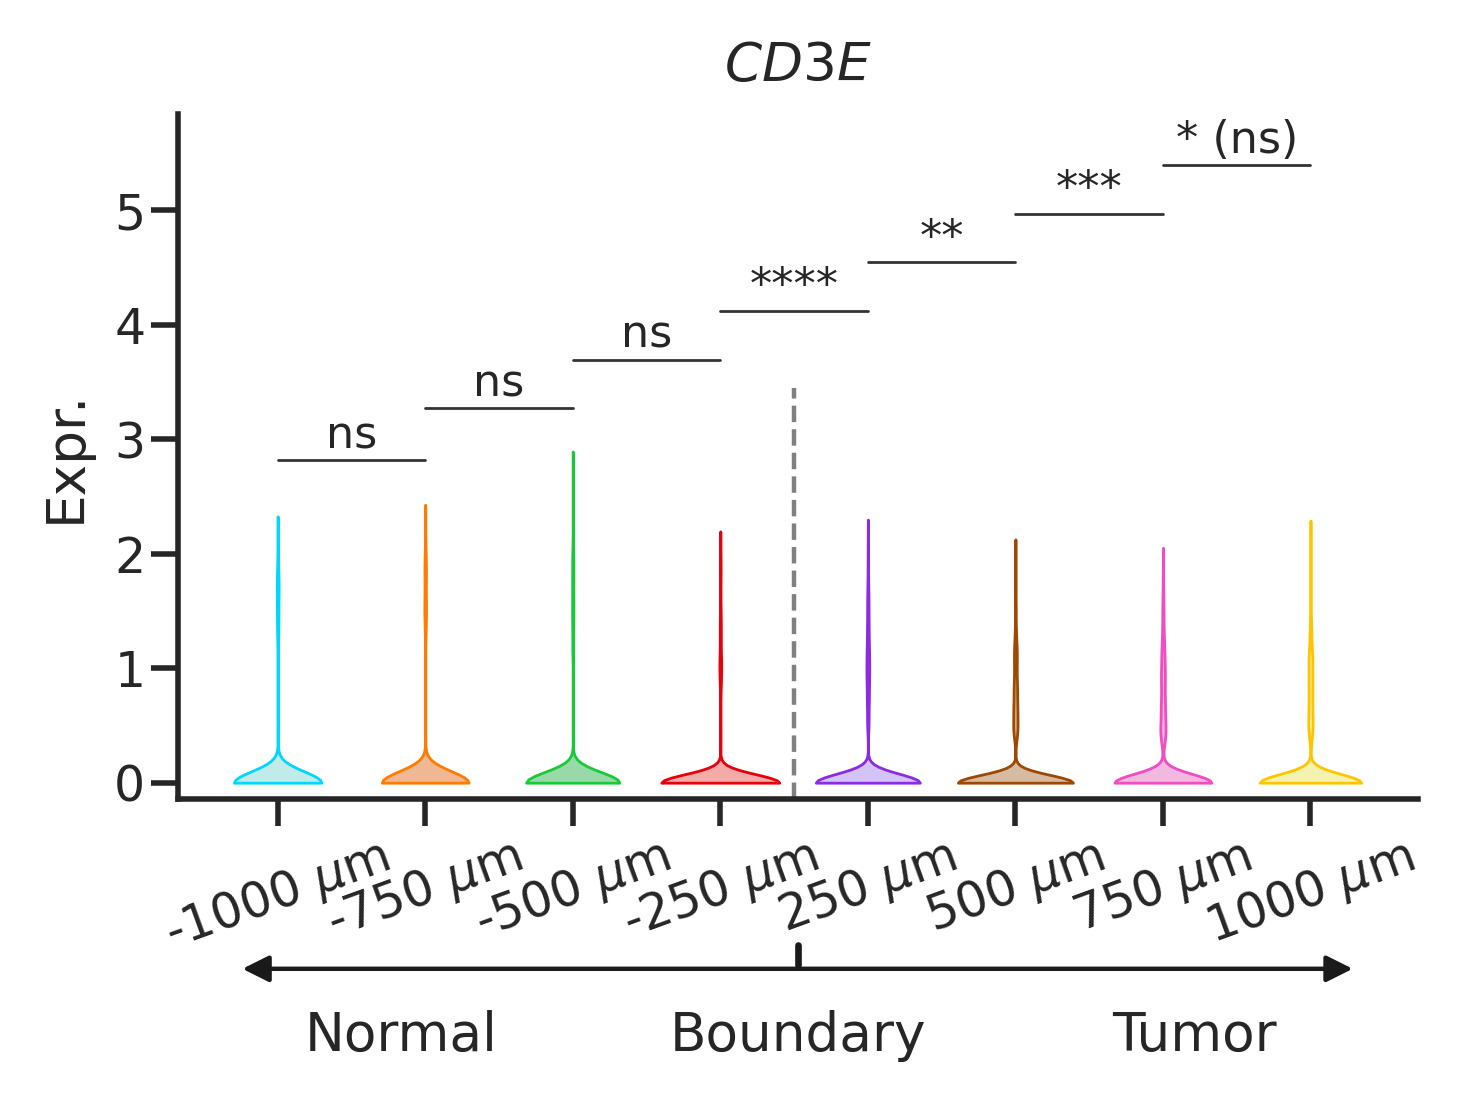

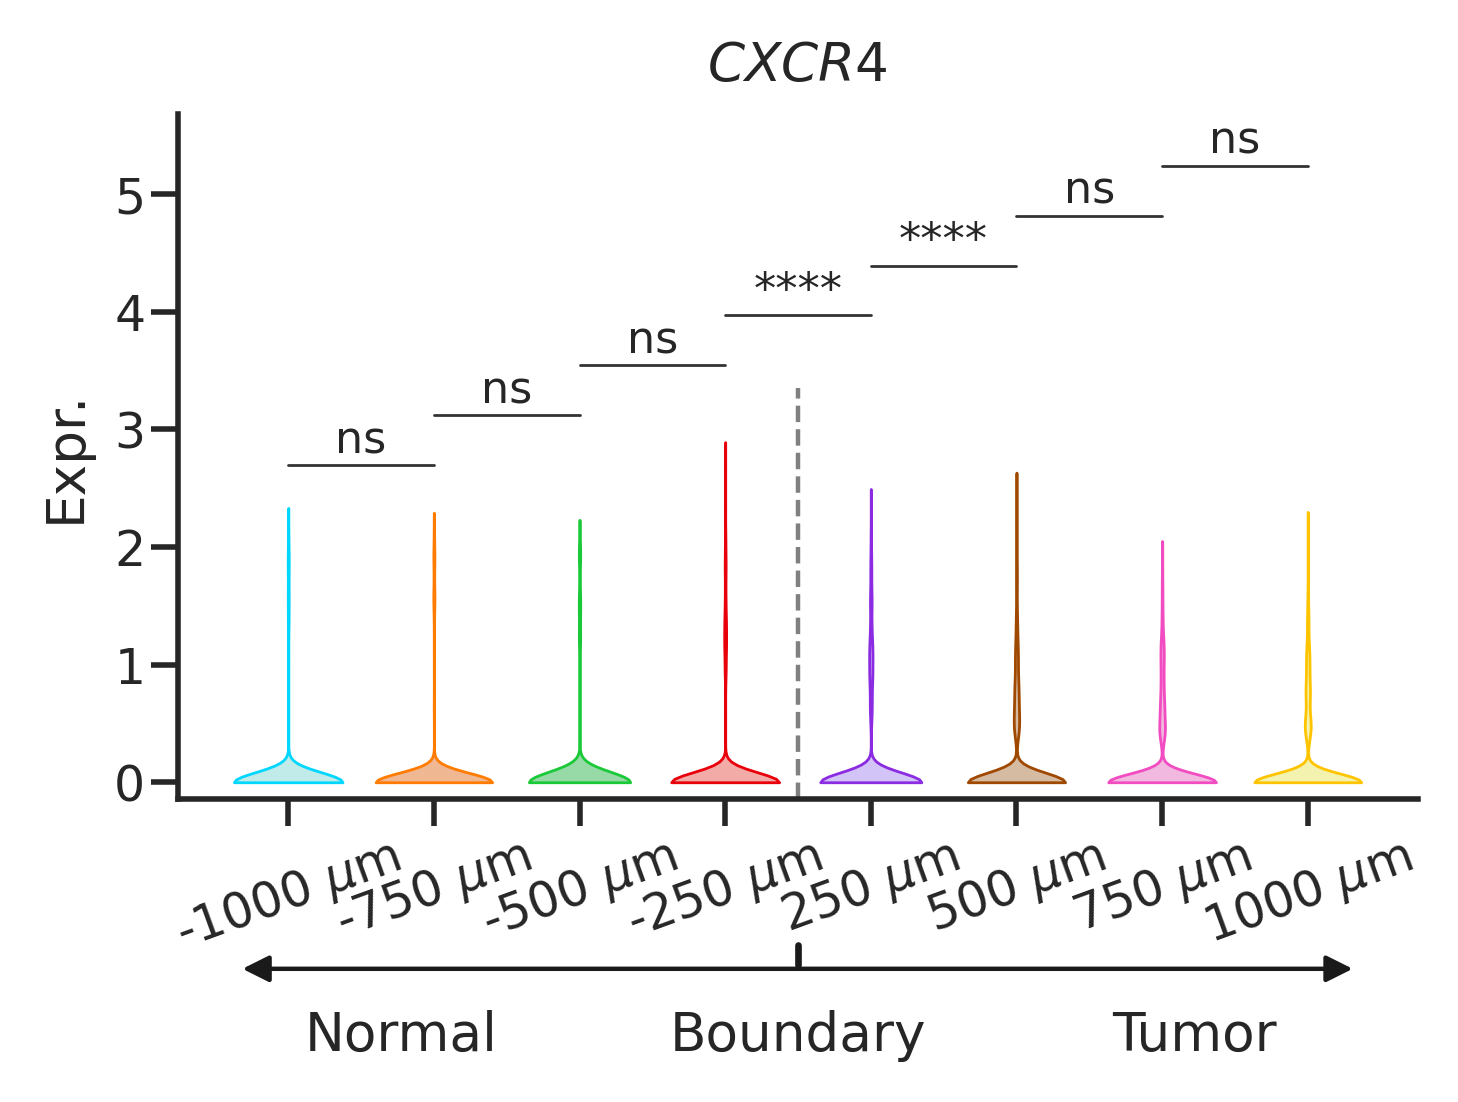

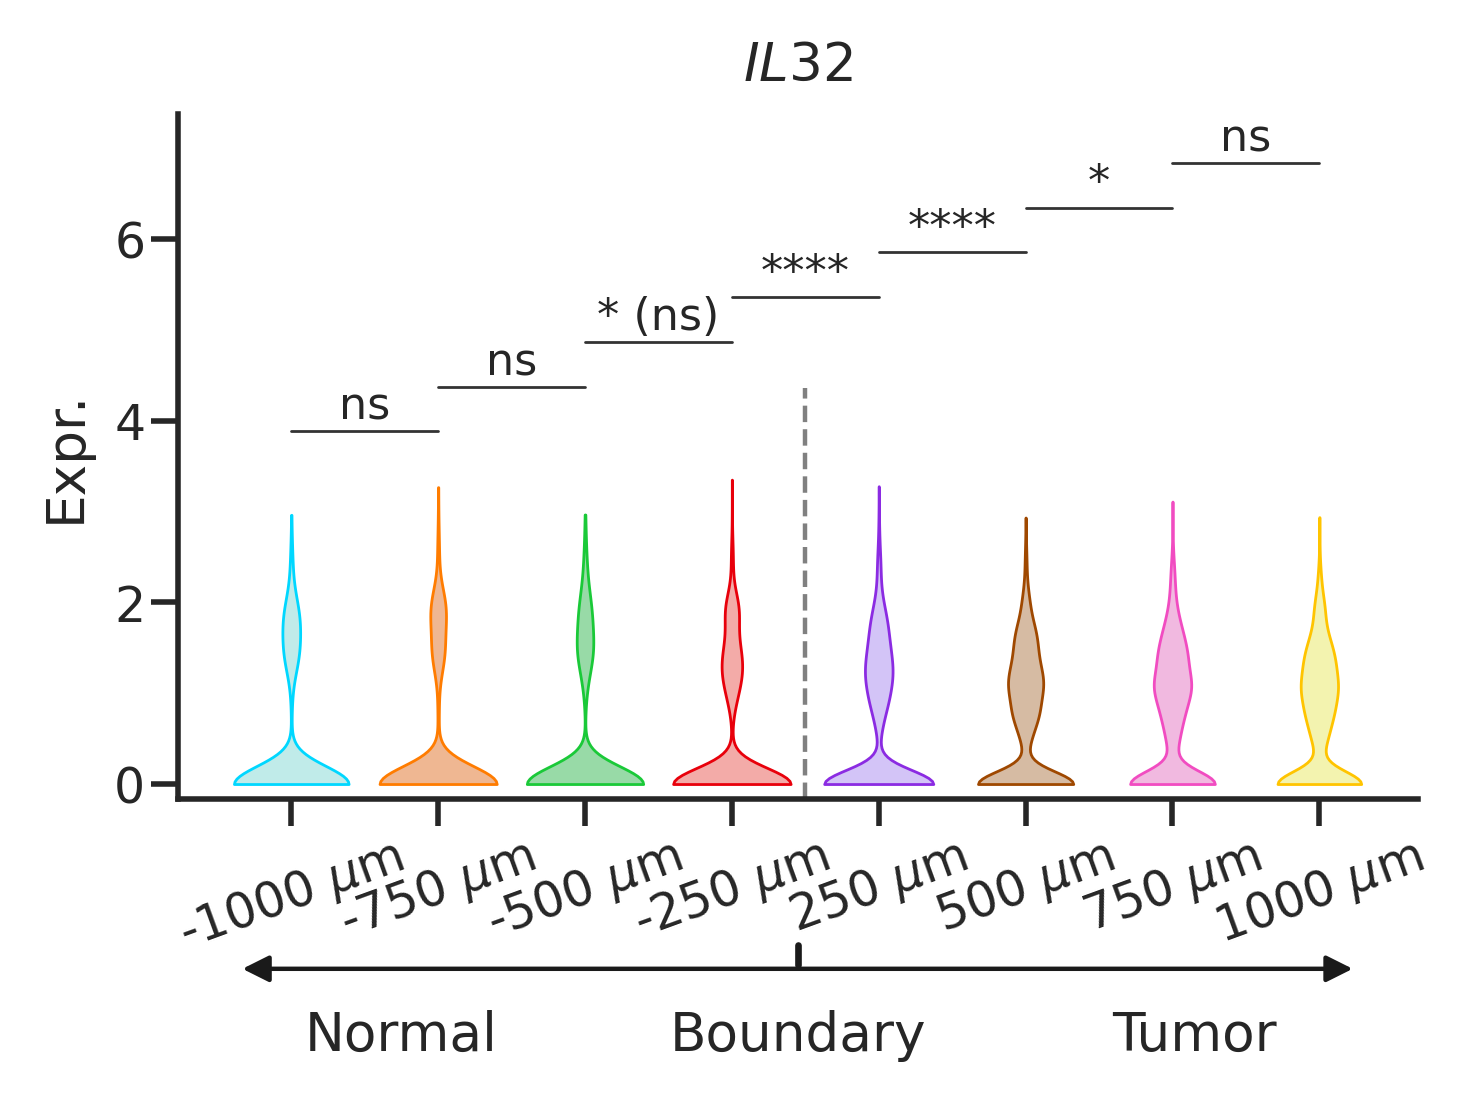

In [57]:
for gene in gene_dict[celltype]:
    plot_show(df_gene, gene, save=True,y_label='Expr.', gene=True, gene_cell_type=celltype)